# Geospatial Data in Python with GeoPandas 

A [D-Lab](https://dlab.berkeley.edu) Workshop, Fall 2019

---




# Introduction



The goal of this notebook is to give you a **tip of the iceberg introduction** to working with geospatial data in Python using the **geopandas** package.  Most of the sample data and use cases are related to a UC Berkeley research a project that I have been working on called [The Louisiana Slave Conspiracies](https://dlab.berkeley.edu/landing-page/louisiana-slave-conspiracies). This project explores several slave conspiracies that occured in colonial Louisiana during the late 1700s and early 1800s. Since very little data exist for this time period, we begin with an exploration of US Census data from the early 1800s, shortly after the Louisiana Purchase made the Louisiana and Orleans Territories part of the United States.

> ### Assumptions

> This tutorial assumptions you have basic working knowledge of Python and of geospatial data.   If you need a geospatial refresher, we can start with this a **very** [Brief Introduction to Geospatial Data](https://docs.google.com/presentation/d/1d9GNcLDsnLxfLmrNRNZE976sHN5qNfkU9Rl2gabUsWc/edit?usp=sharing).

 
 
## GeoPandas and related Geospatial Packages

[GeoPandas](http://geopandas.org/) is a relatively new package that makes it easier to work with geospatial data in Python. In the last few years it has grown more powerful and stable. This really is great because previously it was quite complex to work with geospatial data in Python.  GeoPandas is now the go to package for working with geospatial data. 

`GeoPandas` provides convenient, unified access to the functionality of the [pandas](https://pandas.pydata.org/) package , extending it with the geospatial processing capabilities provided by a number of lower level spatial data packages including [shapely](https://pypi.python.org/pypi/Shapely) for geometry processing, [fiona](https://pypi.python.org/pypi/Fiona) and [GDAL/Ogr](https://gdal.org) for spatial data file IO and[ pyproj](https://github.com/jswhit/pyproj) and [PROJ.4](https://github.com/OSGeo/proj.4/wiki) for map projections and coordinate systems.  


We will also use a few other optional geospatial libraries that are  commonly used with geopandas, including:

- **rtree** for spatial indexing to improve performance
- **geopy** for geocoding and for geodesic distance calculations
- **pysal** for spatial analysis functions such as data classification methods.
- **descartes** for ploting Shapelygeometric objects with Matplotlib.


Finally, we will use a number of standard Python libraries including pandas, numpy, and matplotlib.


# Setup



Installing Geopandas can be a bit complex due to the libraries that it depends on.  See the [Geopandas documentation ](http://geopandas.org/install.html) for help with this process - read it carefully as that will save you many headaches!

We will use the [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) Jupyter notebook environment for this workshop so that we will all have the same working enviroment.

## About Google Colab

Google Colab is a freemium (*i.e., extra stuff costs $$*) Jupyter notebook environment that requires no setup and runs entirely in the cloud.

- A google account is required!

From the browser you can write and execute Python code and save and share your notebooks.

You can also install libraries that are not readily available and import local or remote data.

- However, the libraries you install and data you import are only available to you temporarily in the Colab environment.

### Why we like Colab

- It's free for our needs

- It's fast

- It removes alot of local package install problems so we can get right to work.

- It ensures that all workshop participants have the same computing environment.

### Learning more

To learn more go to the [Welcome to Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb) site.


# Getting Started

- Login to **Google Collaboratory** at <https://colab.research.google.com/notebooks/welcome.ipynb>

- From the **File** menu select **Open Notebook**

- Click on the **GitHUB** tab

- Insert the URL to this github repo: https://github.com/dlab-berkeley/Geospatial-Fundamentals-in-Python

- Then, open the notebook **Geopandas_Intro_Sp2019_GC_may6.ipynb**

*If you are warned that this is not a Google notebook, select "Run anyway".*



## Install Geopandas and dependencies

Google Colaboratory comes with a Juypyter notebook environment with the most common Python packages already installed. To import a library that's not installed by default, you can use **!pip install** or **!apt-get install**.

* You can execute system commands within a juypter notebook by prepending the command with an exclamation mark (also called bang).

<br>

To run Geopandas in Google Colab, execute but do not change the code in the following cell. (*The install process we will follow is from [this notebook](https://colab.research.google.com/drive/1tSmJmjD3sTI31Cg1UCIKiE10dBUmWUG7#scrollTo=wHnmdr_QkKec&forceEdit=true&offline=true&sandboxMode=true)*).

>**IMPORTANT** -  if you are installing these Python packages on your local computer see [Geopandas documentation ](http://geopandas.org/install.html) . Do not use the code below as this is for the Google Colaboratory environment.

If you have your geopandas enviroment installed locally, you can get the data and notebook for this tutorial are in this github repository: https://github.com/dlab-berkeley/Geospatial-Fundamentals-in-Python



In [4]:
#######################################################
# Code to install geopandas in Google Colaboratory
# You need to run this code each time you run this 
# notebook on Google Colab
# Should take about 2 - 8 minutes.
#######################################################
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree
# Install pysal
!pip install pysal
# Install mapclassify
!pip install mapclassify
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [819 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]


## Import GeoPandas and Related Libraries

Next, import the libraries that we will use.


In [0]:
import pandas as pd
import geopandas as gpd
import mapclassify
import matplotlib.pyplot as plt
from shapely.geometry import Point


---

## Geospatial Data and GeoPandas

Geospatial information is represented using two types of data models: vector and raster.

*   Vector data represents geographic information as points, lines or polygons.
*   Raster data represents geographic information as a continuous surface of grid cells.


Take a look at the image below. Can you identify the types of geospatial data that are shown?
<p>&nbsp;</p>
<p>
  <b>Geospatial Data for the City of Berkeley</b>
<img src="https://raw.githubusercontent.com/dlab-berkeley/Geospatial-Fundamentals-in-Python/master/data/geospatial_data_berkeley.png" width="800px"></img>
</p>

<p>
GeoPandas provides support for working with vector spatial data. If you are interested in working with raster data in Python, check out the [rasterio package](https://rasterio.readthedocs.io/en/stable). This workshop only covers vector data.
</p>

## About the Data 

This tutorial uses historical census data for the USA and the Orleans Territory, most of which is now called Louisiana, that were obtained from the `NHGIS`, or *National Historical Geographic Information System* website ([IPUMS NHGIS, University of Minnesota, www.nhgis.org](https://www.nhgis.org)).  A cartographic boundary file for the United States was obtained from the [US Census website](https://www.census.gov/geo/maps-data/data/tiger-cart-boundary.html).


## Fetch the Data with `wget`

The data and related notebooks for this tutorial are in this github repository: https://github.com/dlab-geo/geopandas_intro

In the Google Colaboratory environment you can use the command **wget** to fetch the data from that repo and use it for the duration of this session.


In [171]:
!wget 'https://raw.githubusercontent.com/dlab-geo/geopandas_intro/master/data/us_states.zip'
!wget 'https://raw.githubusercontent.com/dlab-geo/geopandas_intro/master/data/uscounties_1810.zip'
!wget 'https://raw.githubusercontent.com/dlab-geo/geopandas_intro/master/data/orleans_census_data1810.csv'
!wget 'https://raw.githubusercontent.com/dlab-geo/geopandas_intro/master/data/lsc_points.csv'
!wget 'https://raw.githubusercontent.com/dlab-geo/geopandas_intro/master/data/orleans_places.csv'


--2019-10-21 07:21:32--  https://raw.githubusercontent.com/dlab-geo/geopandas_intro/master/data/us_states.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3287089 (3.1M) [application/zip]
Saving to: ‘us_states.zip.1’

us_states.zip.1     100%[===================>]   3.13M  --.-KB/s    in 0.08s   

2019-10-21 07:21:33 (38.9 MB/s) - ‘us_states.zip.1’ saved [3287089/3287089]

--2019-10-21 07:21:33--  https://raw.githubusercontent.com/dlab-geo/geopandas_intro/master/data/uscounties_1810.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273

### Take a look at the data files

Make sure that all of the data has been transferred. You can look at the files using the **ls** system command (on mac) or the **dir()** command (on windows). 

* You can execute system commands within a juypter notebook by prepending the command with an exclamation mark (also called bang).

In [7]:
!ls


lsc_points.csv		     sample_data	  us_states.zip
orleans_census_data1810.csv  uscounties_1810.zip


Some of the files we just fetched are zipped. Let's take a look at those:

* Note below that we combine python commands with system commands.

In [8]:
myfiles = !ls *.zip

myfiles = myfiles[0].split()

print(myfiles)

['uscounties_1810.zip', 'us_states.zip']


Now, unzip the zipped files.

In [9]:
for f in myfiles:
  print("Unzipping: ", f)
  !unzip {f}

Unzipping:  uscounties_1810.zip
Archive:  uscounties_1810.zip
  inflating: uscounties_1810.dbf     
  inflating: uscounties_1810.prj     
  inflating: uscounties_1810.shp     
  inflating: uscounties_1810.shx     
Unzipping:  us_states.zip
Archive:  us_states.zip
  inflating: us_states.dbf           
  inflating: us_states.prj           
  inflating: us_states.shp           
  inflating: us_states.shx           


Take another look at our files.

In [10]:
!ls

lsc_points.csv		     uscounties_1810.prj  us_states.dbf  us_states.zip
orleans_census_data1810.csv  uscounties_1810.shp  us_states.prj
sample_data		     uscounties_1810.shx  us_states.shp
uscounties_1810.dbf	     uscounties_1810.zip  us_states.shx


## Spatial Data File Formats

There are many different types of [vector geospatial data file formats](https://en.wikipedia.org/wiki/GIS_file_formats#Vector). Some that you may have heard of include Shapefiles, GeoJSON, KML, Spatialite, and more.

Of all of the available formats the most commonly used ones are the [ESRI Shapefile](https://en.wikipedia.org/wiki/Shapefile) and the CSV file.

Let's start with a brief discussion of the ESRI Shapefile.

* **ESRI Shapefile**: a collection of 3 to 15 files that collectively make up the Shapefile.
    * `.shp` - the spatial data encoded geometrically as points, lines or polygons
    * `.shx` - the spatial data index
    * `.dbf` - the attribute table that describes each feature
    * `.prj` - a text file that identifies the coordinate reference system (CRS) for the data



## Reading in a Spatial Data from a Shapefile

GeoPandas makes it easy to read in almost any kind of vector data file with the [read_file](http://geopandas.org/io.html) command. Let's use it to read in the data in the **usa1810** shapefile.

In [0]:
usa1810 = gpd.read_file("./uscounties_1810.shp")  #US counties in 1810

Now let's take a look at the first rows of data with the `head` method.

In [12]:
usa1810.head()

,DECADE,NHGISNAM,STATENAM,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry
0,1810,Montgomery,Virginia,G5101210,5101210,2.704401e+09,250108.550595,"POLYGON ((-80.08746 37.16090, -80.09036 37.156..."
1,1810,Montgomery,Maryland,G2400310,2400310,1.311046e+09,174262.163686,"POLYGON ((-76.88789 39.13175, -76.89350 39.123..."
2,1810,Wilkinson,Georgia,G1303190,1303190,1.176078e+09,162471.446923,"POLYGON ((-83.13120 33.00557, -83.13100 33.000..."
3,1810,Claiborne,Tennessee,G4700250,4700250,1.532297e+09,227335.501933,"POLYGON ((-83.20008 36.59390, -83.25243 36.567..."
4,1810,Gallatin,Kentucky,G2100770,2100770,1.099820e+09,188208.818842,"POLYGON ((-84.79541 38.85727, -84.78072 38.765..."


GeoPandas can also read in a zipped shapefile. This can be quite convenient.

* Note, the syntax for reading in a zipped file is slightly different.

In [13]:
# Read in the unzipped shapefile

usa1810 = gpd.read_file("zip://./uscounties_1810.zip")  #US counties in 1810

# Take a look at the GeoDataFrame
usa1810.head()

,DECADE,NHGISNAM,STATENAM,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry
0,1810,Montgomery,Virginia,G5101210,5101210,2.704401e+09,250108.550595,"POLYGON ((-80.08746 37.16090, -80.09036 37.156..."
1,1810,Montgomery,Maryland,G2400310,2400310,1.311046e+09,174262.163686,"POLYGON ((-76.88789 39.13175, -76.89350 39.123..."
2,1810,Wilkinson,Georgia,G1303190,1303190,1.176078e+09,162471.446923,"POLYGON ((-83.13120 33.00557, -83.13100 33.000..."
3,1810,Claiborne,Tennessee,G4700250,4700250,1.532297e+09,227335.501933,"POLYGON ((-83.20008 36.59390, -83.25243 36.567..."
4,1810,Gallatin,Kentucky,G2100770,2100770,1.099820e+09,188208.818842,"POLYGON ((-84.79541 38.85727, -84.78072 38.765..."


*However, sometimes GeoPandas cannot read a zipped shapefile due to its content or the way it was created. If this is the case, unzip it and read it in directly.*


## The Geopandas GeoDataFrame

The `gpd.read_file` command returns a GeoPandas **GeoDataFrame** object.  We can double-check this with the `type` function.



In [14]:
type(usa1810)


geopandas.geodataframe.GeoDataFrame

The `GeoDataFrame` is a **pandas** DataFrame with extra geospatial capabilities. So if you know `pandas` then working with GeoPandas will be much, MUCH easier. 

Let's take a look at the GeoDataFrame again using the **head** method.

- *Do you notice anything different about the GeoDataFrame compared to a regular DataFrame?*

In [15]:
usa1810.head()

,DECADE,NHGISNAM,STATENAM,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry
0,1810,Montgomery,Virginia,G5101210,5101210,2.704401e+09,250108.550595,"POLYGON ((-80.08746 37.16090, -80.09036 37.156..."
1,1810,Montgomery,Maryland,G2400310,2400310,1.311046e+09,174262.163686,"POLYGON ((-76.88789 39.13175, -76.89350 39.123..."
2,1810,Wilkinson,Georgia,G1303190,1303190,1.176078e+09,162471.446923,"POLYGON ((-83.13120 33.00557, -83.13100 33.000..."
3,1810,Claiborne,Tennessee,G4700250,4700250,1.532297e+09,227335.501933,"POLYGON ((-83.20008 36.59390, -83.25243 36.567..."
4,1810,Gallatin,Kentucky,G2100770,2100770,1.099820e+09,188208.818842,"POLYGON ((-84.79541 38.85727, -84.78072 38.765..."


Because a GeoDataFrame is a pandas DataFrame you can use all the pandas DataFrame methods with it.  Some examples are shown below.


In [16]:
# How many states or territories did the USA have in 1810?

usa1810.STATENAM.nunique()  

24

In [17]:
# What states had the most counties in 1810?
usa1810.STATENAM.value_counts()

Virginia                 99
North Carolina           63
Kentucky                 54
New York                 43
Pennsylvania             42
Tennessee                39
Georgia                  38
Ohio                     36
South Carolina           29
Massachusetts            20
Maryland                 20
Orleans Territory        20
New Jersey               13
Mississippi Territory    12
Vermont                  12
Louisiana Territory       8
Connecticut               8
New Hampshire             6
District of Columbia      5
Michigan Territory        5
Rhode Island              5
Indiana Territory         5
Delaware                  3
Illinois Territory        2
Name: STATENAM, dtype: int64

In [18]:
# What was the total area in square kilometers of the USA in 1810?

print("The area of the USA in 1810 was %d square meters!" %  usa1810.SHAPE_AREA.sum())

The area of the USA in 1810 was 4538515207970 square meters!


In [19]:
# What were the 5 largest states or territories?
usa1810[['STATENAM','SHAPE_AREA']].groupby(['STATENAM']).sum().sort_values(['SHAPE_AREA'], ascending=False).head(5)

,SHAPE_AREA
STATENAM,
Louisiana Territory,2.291642e+12
Illinois Territory,3.836680e+11
Mississippi Territory,2.416629e+11
Virginia,1.663333e+11
Georgia,1.522128e+11


**Suggestion**: If you don't know pandas or want to refresh your knowledge of it we recommend you take an online tutorial or D-Lab workshop to get familiar with its methods for data manipulation and analysis.  That will make it easier for you to get the most out of GeoPandas.

### Rename columns

The columns that contain the county and state names are labeled `NHGISNAM` and `STATENAM`. Use the pandas `rename` method to rename the county and state name columns. This will make our work with the data more intuitive moving forward.

In [20]:
usa1810.rename(columns={'NHGISNAM' : 'COUNTY', 'STATENAM': 'STATE'}, inplace=True)
usa1810.head()

,DECADE,COUNTY,STATE,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry
0,1810,Montgomery,Virginia,G5101210,5101210,2.704401e+09,250108.550595,"POLYGON ((-80.08746 37.16090, -80.09036 37.156..."
1,1810,Montgomery,Maryland,G2400310,2400310,1.311046e+09,174262.163686,"POLYGON ((-76.88789 39.13175, -76.89350 39.123..."
2,1810,Wilkinson,Georgia,G1303190,1303190,1.176078e+09,162471.446923,"POLYGON ((-83.13120 33.00557, -83.13100 33.000..."
3,1810,Claiborne,Tennessee,G4700250,4700250,1.532297e+09,227335.501933,"POLYGON ((-83.20008 36.59390, -83.25243 36.567..."
4,1810,Gallatin,Kentucky,G2100770,2100770,1.099820e+09,188208.818842,"POLYGON ((-84.79541 38.85727, -84.78072 38.765..."


## CSV Files as Geospatial Data File Format


A **CSV** is a text file with a `.csv` file extension that contains rows of comma separated values where, typically, the first row has the column names.


For example, take a look at the file `lsc_points.csv` which contains the names and locations of Louisiana Slave Conspiracies:

In [170]:
!cat lsc_points.csv

name,date,latitude,longitude
Mina Slave Conspiracy,1791,30.682988,-91.475365
Pointe Coupee Slave Conspiracy,1795,30.724767,-91.465912
German Coast Uprising,1811,30.033081,-90.48767

It's a two step process for creating a GeoDataFrame from a CSV file:

1. Read the csv file into a Pandas DataFrame.

2. Convert the DataFrame to a GeoDataFrame.

We show these steps below.

In [172]:
# Read the csv file into a Pandas DataFrame.
lsc_df = pd.read_csv("./lsc_points.csv")
 
# Take a look at the data
lsc_df

,name,date,latitude,longitude
0,Mina Slave Conspiracy,1791,30.682988,-91.475365
1,Pointe Coupee Slave Conspiracy,1795,30.724767,-91.465912
2,German Coast Uprising,1811,30.033081,-90.487670


Once we identify the columns in the dataframe that contain the geometry we can create a GeoDataFrame as follows.

In [173]:
#Convert the DataFrame to a GeoDataFrame.
lsc_locs = gpd.GeoDataFrame(
    lsc_df, geometry=gpd.points_from_xy(lsc_df.longitude, lsc_df.latitude))

# Take a look
lsc_locs.head()

,name,date,latitude,longitude,geometry
0,Mina Slave Conspiracy,1791,30.682988,-91.475365,POINT (-91.47536 30.68299)
1,Pointe Coupee Slave Conspiracy,1795,30.724767,-91.465912,POINT (-91.46591 30.72477)
2,German Coast Uprising,1811,30.033081,-90.487670,POINT (-90.48767 30.03308)


### Challenge

Read in the CSV file **orleans_places** and create a GeoDataFrame from it called **orleans_places**.

In [0]:
## Your code here to read the csv file into a Pandas dataframe

In [0]:
## Your code to create a gdf from the df

### Challenge - Solution

In [174]:
# Read the csv file into a Pandas df.
orleans_places_df = pd.read_csv("./orleans_places.csv")

#take a look
orleans_places_df.head()

,place,desc,longitude,latitude
0,Attakapas,A region to the southwest of Pointe Coupée tow...,-91.9340,29.9530
1,Avoyelles,"An region adjacent to northwest Pointe Coupée,...",-92.0206,31.0285
2,Bayou St. Jean,An area between New Orleans and Lake Pontchart...,-90.1262,30.0112
3,Cabahanocé,An area in present-day St. James Parish along ...,-90.8930,30.0980
4,Galveztown,"A settlement just southeast of Baton Rouge, no...",-91.0140,30.4400


In [176]:
#Convert the df to a gdf.
orleans_places = gpd.GeoDataFrame(
    orleans_places_df, geometry=gpd.points_from_xy(orleans_places_df.longitude, orleans_places_df.latitude))

# Take a look
orleans_places.head()

,place,desc,longitude,latitude,geometry
0,Attakapas,A region to the southwest of Pointe Coupée tow...,-91.9340,29.9530,POINT (-91.93400 29.95300)
1,Avoyelles,"An region adjacent to northwest Pointe Coupée,...",-92.0206,31.0285,POINT (-92.02060 31.02850)
2,Bayou St. Jean,An area between New Orleans and Lake Pontchart...,-90.1262,30.0112,POINT (-90.12620 30.01120)
3,Cabahanocé,An area in present-day St. James Parish along ...,-90.8930,30.0980,POINT (-90.89300 30.09800)
4,Galveztown,"A settlement just southeast of Baton Rouge, no...",-91.0140,30.4400,POINT (-91.01400 30.44000)


# GeoDataFrame Deep Dive

## The GeoDataFrame Geometry Column

All GeoPandas GeoDataFrames must have one *special* geometry column that contains the spatial data. This column is named **geometry** by default, but it could be something else. 

When you read in a spatial data file such as a Shapefile to create a new GeoDataFrame the `geometry` column is automatically created. 
 
 
 You can always get the name of your special geometry column:

In [177]:
usa1810.geometry.name

'geometry'

In [178]:
lsc_locs.geometry.name

'geometry'



The geometry column is of type **GeoSeries**, taking its name and its base functionality from the pandas series object.   





In [179]:
type(usa1810.geometry)

geopandas.geoseries.GeoSeries

Not all columns in the GeoDataFrame are of type geoseries. What is the type of the COUNTY column?

In [180]:
type(usa1810.COUNTY)

pandas.core.series.Series

A **GeoDataFrame** is a collection of GeoSeries and Series objects - these are the columns in the table.

The data within each column also has a data type. You can check the type of data within the GeoSeries and Series columns using the **dtypes** method.



In [181]:
usa1810.dtypes

DECADE          object
COUNTY          object
STATE           object
GISJOIN         object
GISJOIN2        object
SHAPE_AREA     float64
SHAPE_LEN      float64
geometry      geometry
dtype: object

The `dtypes` method shows that the data in the geometry column are of type `geometry`. GeoPandas extends Pandas by adding this data type.

* Note, Python labels character string data as an "object".

 



## Any Questions?

## GeoPandas Geometries

A GeoPandas GeoDataFrame is a Pandas DataFrame that contains a special geometry column. That geometry column is of type GeoSeries and it contains data of type geometry.

A GeoPandas supports three basic types of vector geometries:
- **Points / MultiPoints**
    - POINT( -122 38)

    - MULTIPOINT((-122 38), (-123 39))
    
- **Lines / MultiLines**
    - LINE (30 10, 10 30, 40 40)
    
    - MULTILINE((10 10, 20 20, 10 40),(40 40, 30 30, 40 20, 30 10))
    
- **Polygons / MultiPolygons**
    - POLYGON ((35 10, 45 45, 15 40, 10 20, 35 10), (20 30, 35 35, 30 20, 20 30))
    - MULTIPOLYGON (((30 20, 45 40, 10 40, 30 20)), ((15 5, 40 10, 10 20, 5 10, 15 5)))

 

 
**Notes**

* These geometries are displayed above and in the GeoDataFrame in what is called **Well-Known Text** format.

* A GeoSeries can contain mixed geometry types.



Let's check the specific geometry type(s) in our GeoDataFrame.

In [182]:
set(usa1810.geom_type)  # set returns unique values

{'MultiPolygon', 'Polygon'}

### Question
Why would this dataframe of **counties** contain both Polygon and Multipolygon geometries?

### Question

What specific geometry types are in the orleans_places gdf?

In [0]:
# Your answer here...

## GeoDataFame, GeoSeries, Geometry, Oh My!


Let's take a look at a GeoDataFrame a bit more closely.

First, let's subset the `usa1810` GeoDataFrame to select only the rows for the state of New York.

In [185]:
ny_gpd = usa1810[usa1810['STATE']=='New York']

print("The ny_gpd object is of type: ", type(ny_gpd), "\n")

ny_gpd.head()

The ny_gpd object is of type:  <class 'geopandas.geodataframe.GeoDataFrame'> 



,DECADE,COUNTY,STATE,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry
18,1810,Suffolk,New York,G3601030,3601030,2.416189e+09,1.329778e+06,"MULTIPOLYGON (((-73.42417 40.65800, -73.42467 ..."
26,1810,Columbia,New York,G3600210,3600210,1.679000e+09,1.844468e+05,"POLYGON ((-73.49688 42.04967, -73.52142 42.049..."
109,1810,Steuben,New York,G3601010,3601010,4.172335e+09,2.680999e+05,"POLYGON ((-76.87843 42.38896, -76.95153 42.386..."
120,1810,Saratoga,New York,G3600910,3600910,2.185179e+09,2.441839e+05,"POLYGON ((-73.63546 42.94129, -73.63995 42.939..."
128,1810,Cayuga,New York,G3600110,3600110,2.474424e+09,2.994366e+05,"POLYGON ((-76.27467 42.77126, -76.27318 42.750..."


Now let's create a GeoSeries from the geometry column in the GeoDataFrame.

In [186]:
ny_gs = ny_gpd.geometry

print("The ny_gs object is of type: ", type(ny_gs), "\n")

ny_gs.head()

The ny_gs object is of type:  <class 'geopandas.geoseries.GeoSeries'> 



18     MULTIPOLYGON (((-73.42417 40.65800, -73.42467 ...
26     POLYGON ((-73.49688 42.04967, -73.52142 42.049...
109    POLYGON ((-76.87843 42.38896, -76.95153 42.386...
120    POLYGON ((-73.63546 42.94129, -73.63995 42.939...
128    POLYGON ((-76.27467 42.77126, -76.27318 42.750...
Name: geometry, dtype: geometry

Finally, let's get the geometry value itself.  

To extract a single value from a Series or GeoSeries you use its row index. 

The ny_geom object is of type:  <class 'shapely.geometry.multipolygon.MultiPolygon'> 



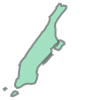

In [187]:
# Get the geometry for NYC - we just know the index value :)
ny_geom = ny_gs[414]

print("The ny_geom object is of type: ", type(ny_geom), "\n")

ny_geom


As shown above, when you return a single geometry, the object is plotted. To see the data  in  [well-known text](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry) format, or WKT,  use the `print` function.

In [188]:
print(ny_geom)

MULTIPOLYGON (((-73.92229355831348 40.87487157795319, -73.92069039881926 40.87327539298192, -73.91774000480581 40.87455499738851, -73.91147195664016 40.87342403916151, -73.91116101760899 40.86893601944546, -73.9153810331171 40.86317599477722, -73.92185801769043 40.85602199251285, -73.9282999703982 40.84696901542971, -73.93396896930351 40.83772901890468, -73.93519399027261 40.83239899178896, -73.93391904414739 40.82357602299151, -73.93421296965388 40.81132999730605, -73.93298902121144 40.80746301717132, -73.93002105650901 40.80319500753232, -73.92864297128597 40.79885199407978, -73.92910095527357 40.7950609976286, -73.93524401445616 40.79191302509018, -73.93959799400261 40.78551298250358, -73.94332599282814 40.7832190225023, -73.94221700061863 40.77786400285551, -73.9441620066076 40.77304101161726, -73.95007803406234 40.76712199534614, -73.96802900305495 40.74796899682451, -73.97187900558785 40.74312198617113, -73.9725549957529 40.73692297709503, -73.97421499639928 40.73522499277671, -7

## GeoPandas Attributes and Methods

GeoPandas extends Pandas with 
Geopandas spatial attributes and methods apply to the special `geometry` column.


For example, the code in the following cell returns the `total_bounds` attribute. These are the coordinates for the minimum bounding box that contain all geometries in the `geometry` GeoSeries.

In [189]:
usa1810.geometry.total_bounds

array([-113.93800453,   28.930763  ,  -66.94992703,   49.001132  ])

GeoPandas will apply a spatial method to the geometry column even if you do not explicitly reference it.

In [190]:
usa1810.total_bounds

array([-113.93800453,   28.930763  ,  -66.94992703,   49.001132  ])

Most Geopandas geometry methods and attributes apply to **each** geometry in the Geoseries rather than **all** in the aggregrate. 

For example, let's use the bounds attribute to see the bounding coordinates of each county in the usa1810 geodataframe.

In [191]:
usa1810.bounds.head()

,minx,miny,maxx,maxy
0,-80.842463,36.709159,-80.087459,37.367239
1,-77.527076,38.934311,-76.887893,39.353648
2,-83.407188,32.584256,-82.945166,33.008666
3,-83.999404,36.290665,-83.200076,36.600814
4,-85.456881,38.472763,-84.774217,38.857271


To see all of the attributes and methods of a GeoDataFrame, enter its name followed by a period and hit the tab key. Try that below.

In [0]:
#usa1810.

In the rest of this tutorial we will explore the basic GeoPandas methods for working with GeoDataFrames, GeoSeries and geometries.

## Summary

GeoPandas extends Pandas with attributes and methods for **GeoDataFrames**, **GeoSeries** and **geometry** objects.

The geometry column returns a GeoSeries even if only one row is requested. But many operations in GeoPandas only work on the geometry value and not the GeoSeries object.

As you work with GeoPandas and read through the [online documentation](http://geopandas.org) keep in mind which type of object you are working with and what type is required as input to a method or returned by a specific method or attribute.




# Mapping GeoDataFrames


One of the first things to do with geographic data once you read it into GeoPandas is visualize it.

The GeoPandas **plot** method will display the data in a GeoDataFrame or GeoSeries. This uses `matplotlib` and the matplotlib `pyplot` module under the hood.

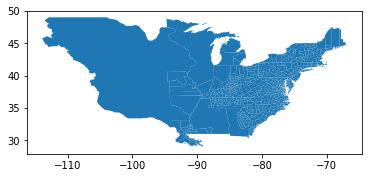

In [193]:
# Plot a GeoDataFrame
usa1810.plot()  # it's really that simple!

We can also plot a subset of the geodataframe.

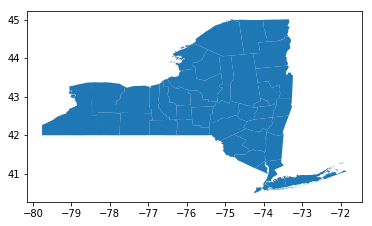

In [194]:
# Plot all the 1810 counties in New York state
usa1810[usa1810['STATE']=='New York'].plot()

And we can plot a geoseries with plot()

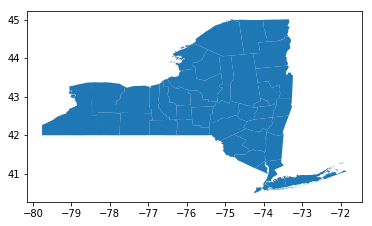

In [195]:
# plot the geometry geoseries
usa1810[usa1810['STATE']=='New York'].geometry.plot()

Pretty cool to be able to make a map with a single command. However, there is always room for improvement. You can find out more about the plotting options for basic maps in the geopandas documentation and in the [matplotlib](https://matplotlib.org/) documentation.

</br>

For now, let's use some options to make a prettier map. Take a minute to consider what each option does.

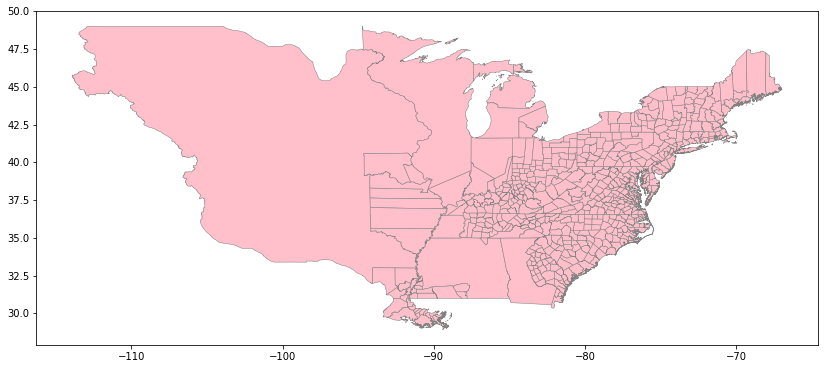

In [196]:
usa1810.plot(linewidth=0.5, edgecolor='grey', facecolor='pink',  figsize=(14,10) )
plt.show()

When you have time, take a look at the method documentation for **plot** to see all of the available options.


In [0]:
#gpd.GeoDataFrame.plot?
#gpd.GeoSeries.plot?

## Question

Can you think of why the options for plotting a GeoDataFrame are different from those for a GeoSeries?

## Challenge

Let's take a few minutes to practice some of what we have done so far with a different data set.

- Read the **us_states** shapefile into a GeoPandas GeoDataFrame named **usa**.
- Take a look at the data in this dataframe using `head`.
- Then, make a map of the `usa`, 
    - setting the `figsize` to (14,10)
    - the fill color to green,
    - and the outline color to white

In [0]:
# your code here to load the data from the zip file into a geodataframe


In [0]:
# your code here to plot the geodataframe

## Challenge - solution

In [40]:
usa = gpd.read_file('zip://./us_states.zip')
usa.head()

,STATE,GEOID,ABBREV,geometry
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,02,AK,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


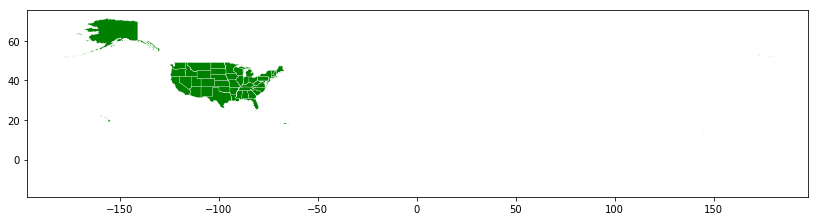

In [41]:
usa.plot(linewidth=0.25, edgecolor='white', facecolor='green',figsize=(14,10))

## Spatial Subsetting

It's never easy to make a nice map of the entire US. Why is that? 

We can zoom in on the contiguous USA by spatially subsetting the data using the GeoPandas **cx** method.  This method takes the form:
>usa1810.cx[xmin:xmax, ymin:ymax]

>where:
- **xmin** is the minimum X coordinate value
- **xmax** is the maximum X coordinate value 
- **ymin** is the minimum Y coordinate value
- **ymax** is the maximum Y coordinate value 

Since our date use geographic coordinates, X values are decimal degrees `longitude` and Y values are in decimal degrees `latitude`.

Let's give it a try.

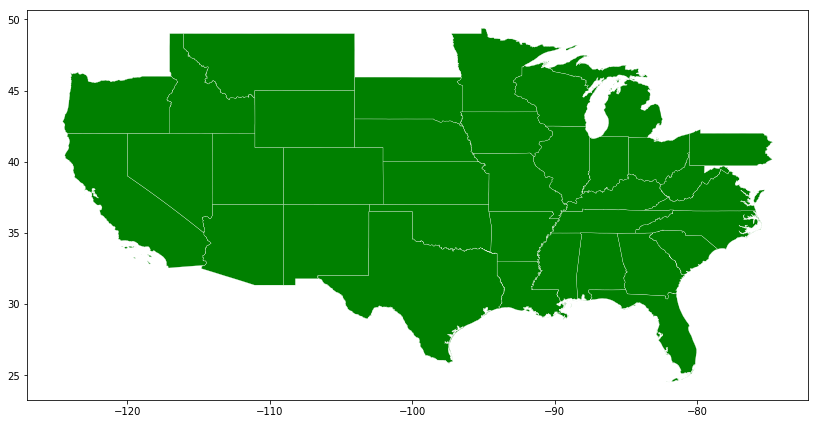

In [42]:
usa.cx[-130:-80, 25:45].plot(linewidth=0.25, edgecolor='white', facecolor='green',figsize=(14,10))

## Questions

How did that last map turn out?

What exactly is **cx** doing?  Let's explore it a bit more. 

- Change the minimum Y value to 30 and then 35. Do Texas and Florida get clipped?

Take a second to uncomment the command below and read the documentation for `cx`. Then update the values in the previous code cell to get all states.

In [0]:
#usa.cx?

### Saving a spatial subset

We can make that subset permanent.

In [44]:
# FYI: conus is shorthand for contiguous USA
conus= usa.cx[-130:-50, 20:50].copy().reset_index(drop=True)
conus.head()

,STATE,GEOID,ABBREV,geometry
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
2,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
3,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
4,Colorado,08,CO,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."


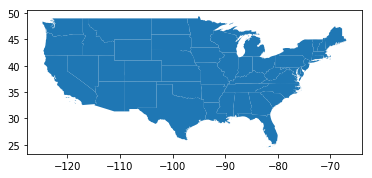

In [45]:
# Plot the subset
conus.plot()

In [46]:
conus.STATE.nunique()

49

## *Any questions?*



---



## Map Overlays



A key strength of geospatial data analysis is the ability to overlay data that are located in the same coordinate space. Let's overlay the USA in 1810 on top of the USA in 2017 to visualize the change. Both of these data sets use the same coordinate reference system -  decimal degrees of latitude and longitude referenced to the **World Geodetic System of 1984**, or **WGS84** coordinate reference system (more about that in a minute). 


The general process for creating map with multiple data layers is as follows:

- First identify your base map - the layer to draw first, or at the bottom of the stack of layers.
- Then you add one or more additional layers, referencing the base map as the **ax**.

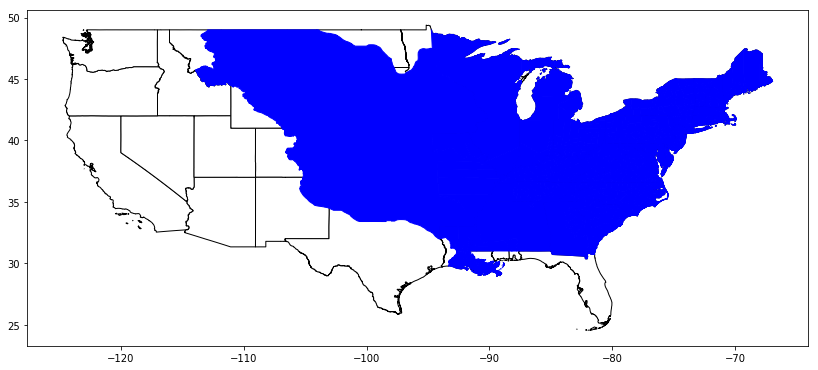

In [199]:
# Map the us states with the 1810 states and territories overlayed.
base = conus.plot(color='white', edgecolor='black',  figsize=(14,10))
usa1810.plot(ax=base, color="blue", edgecolor="blue")

We can add even more layers. These will draw in the order that you add them. Consider the following code.

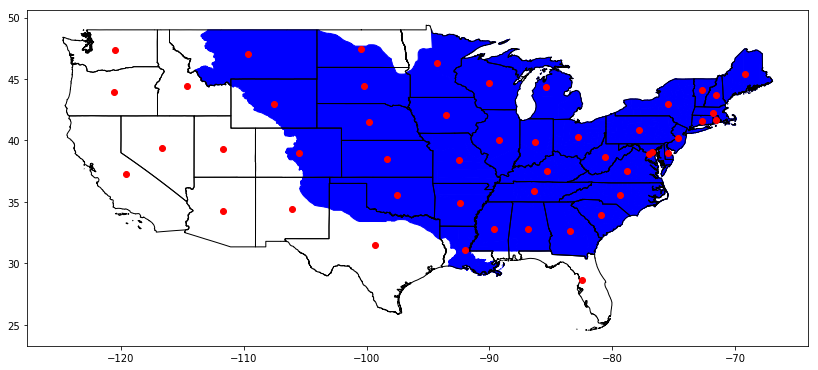

In [200]:
base = usa1810.plot(facecolor="blue", edgecolor="blue",  figsize=(14,10))
conus.plot(ax=base, color='None', edgecolor='black')
conus.centroid.plot(ax=base, color="red")  # Hey - what's happening here?

What's different in the code for the previous two maps?

</br>

We can get even fancier with our maps by using the more **matplotlib** options. To access these you need to import mapplotlib.

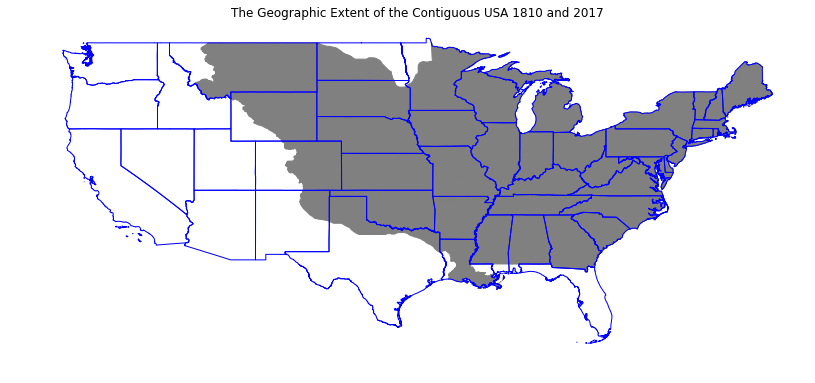

In [201]:
# Mapping with advanced matplotlib settings

fig, ax = plt.subplots(1, figsize=(14,10))  # Initialize the plot figure (drawing area) and axes (data area)

ax.set_aspect('equal')   # set the aspect ratio for the x and y axes to be equal. 
                         # This is done automatically in gdf.plot()
    
base = usa1810.plot(ax=ax, color='grey', edgecolor='grey')  # Set the base map, or bottom map layer

conus.plot(ax=base, color='None', edgecolor="blue")  # draw the data with the base
_ = ax.axis('off') # Don't show the x, y axes and labels in the plot
ax.set_title("The Geographic Extent of the Contiguous USA 1810 and 2017")  # Give the plot a title

plt.show()

### Challenge

Make a map that overlays the `orleans_places` over the usa1810 where the STATE value is `Orleans Territory`

- Color the points "red" so that they are visible.

In [0]:
# Your code here

### Challenge - Solution

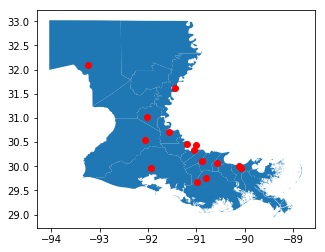

In [205]:
base = usa1810[usa1810['STATE']=='Orleans Territory'].plot()
orleans_places.plot(ax=base, color="red")

## Any Questions?

Many folks, myself included, scratch their head and copy matplotlib code, amazed and mystified when it works. Gradually the syntax sinks in!

# Coordinate Reference Systems (CRS) 



Did you notice anything funny about the **shape** of the USA as mapped above?  How does it differ from the shape of the US in the map below?
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Map_of_USA_with_state_names.svg/640px-Map_of_USA_with_state_names.svg.png" width="800px"></img>


#### Why does the shape differ? 

Here's why:

<img src="http://tse3.mm.bing.net/th?id=OIP.lyDmHXX9VdoEOWDQlqppSAHaEy" width="500px"></img>

When we map the shperoidal earth on a 2D plane like a computer screen we get distortion!

## Map Projections and CRS Transformations

In order to reduce distortion in maps we apply a map projection (math) to transform 3D geographic coordinates to 2D projected map coordinates.
<img src="https://www.e-education.psu.edu/natureofgeoinfo/sites/www.e-education.psu.edu.natureofgeoinfo/files/image/projection.gif"></img>


CRS transformations are often necessary for geopandas geometric operations like area and distance calculations which assume a 2D plane.

## Defining and Transforming a CRS
The process for transforming a CRS is:

1. Check the **crs** of the data - make sure it is defined.
2. If it is not set, you can **define** it.
3. Transform the coordinate geometry to a new CRS using the **to_crs** method.

This returns a new GeoDataFrame with the new coordinate values and CRS.


Let's check the CRS of our GeoDataFrames

In [206]:
# Check the CRS of our gdfs
print("The CRS of the conus geodata frame is: " + str(conus.crs))
print("The CRS of the usa1810 geodata frame is: " + str(usa1810.crs))
print("The CRS of the lsc_locs geodata frame is: " + str(lsc_locs.crs))
print("The CRS of the orleans_places geodata frame is: " + str(orleans_places.crs))


The CRS of the conus geodata frame is: {'init': 'epsg:4326'}
The CRS of the usa1810 geodata frame is: {'init': 'epsg:4326'}
The CRS of the lsc_locs geodata frame is: None
The CRS of the orleans_places geodata frame is: None


### The good news and the bad news...

The CRS of half of these GeoDataFrames is set!

This is not surprising. 

* The two GeoDataFrames that were created from shapefiles have a CRS because the shapefile format included that information.

* The two GeoDataFrames created from CSV files do not have CRSs because that info was not in the CSV file.


### The confusing news

The CRS of the first two GeoDataFrames is set to **epsg:4326** - what's that?

### EPSG 4326

**4326** is the [EPSG](http://www.epsg.org/) code for the geographic CRS known as the [World Geodectic System of 1984](https://en.wikipedia.org/wiki/World_Geodetic_System#WGS84), or `WGS84`. This is the most common CRS for latitude and longitude data. It is the default CRS for most mapping software when the data does not have a defined CRS.

* EPSG stands for European Petroleum Survey Group




## Setting a CRS

We can set, or define, the CRS of a GeoDataFrame if we know what it is. 

**Question:** What do you think is the CRS for the `lsc_locs` and `orleans_places` GeoDataFrames?




Let's set the CRS for these gdfs to WGS84 since coordinates are longitude and latitude values.

In [207]:
# Set it
lsc_locs.crs = {'init' :'epsg:4326'}
orleans_places.crs = {'init' :'epsg:4326'}

# Check it
print("The CRS of the lsc_locs geodata frame is: " + str(lsc_locs.crs))
print("The CRS of the orleans_places geodata frame is: " + str(orleans_places.crs))

The CRS of the lsc_locs geodata frame is: {'init': 'epsg:4326'}
The CRS of the orleans_places geodata frame is: {'init': 'epsg:4326'}


**Note**: Setting the CRS does not change any of the geometry data. It simply sets the value of this so that the software compare it against an internal database and  properly interpret it.

## Reprojecting a GeoDataFrame

There are a number of reasons why you might one to transform your data to another CRS, including:

- To make prettier maps
- To make more accurate spatial measurements
- To get all data in the same CRS for spatial analysis.

This process is called **reprojecting** the data because the operation is mathematical transformation of the geometry based on a specific [map projection](https://en.wikipedia.org/wiki/Map_projection).


### Making better Maps

For example, we can make our maps look better by transforming the data from geographic CRS (longitude and latitude) to a 2D projected `CRS`. 


Common map projections for data that spans the entire continguous USA and their EPSG codes include:

- **Web Mercator** (epsg:3857)
- **USA Contiguous Albers Equal Area** (epsg:5070)

Let's plot the conus GeoDataFrame using the Web Mercator projection.

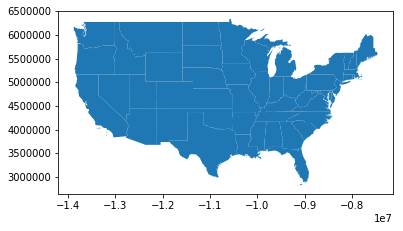

In [208]:
conus.to_crs(epsg=3857).plot()

The above code did not change the geodataframe. It dynamically transformed the geometry and then plotted it.

Since these transformations can be computationally intensive and we often want to reuse the result, let's save the output to a new object.

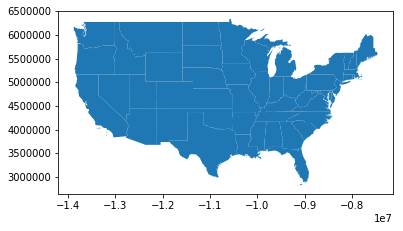

In [209]:
# Transform geographic crs to web mercator - 3857
conus_3857 = conus.to_crs(epsg=3857)
conus_3857.plot()

## Challenge

Now you try it! Transform the **conus** geodataframe to one that uses the **USA Contiguous Albers** (5070) CRS and name it **conus_5070**.

Then, map the output GeoDataFrame.

In [0]:
# Your code here


## Challenge Solution

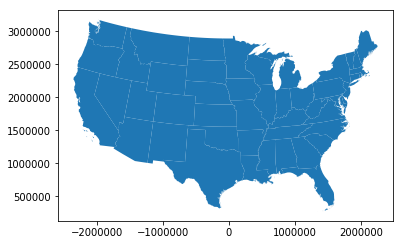

In [210]:
# Transform the conus geodataframe to USA Albers (5070)
conus_5070 = conus.to_crs(epsg=5070)
conus_5070.plot()

## Multiplots

Let's plot all the data in all 3 CRS together.

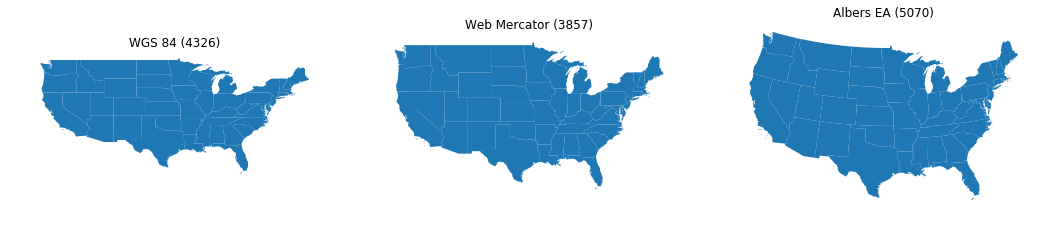

In [211]:
fig, ax = plt.subplots(ncols=3, figsize=(18,4), subplot_kw=dict(aspect='equal'))
# Don't show the coordinate axis
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
# Show a title
ax[0].set_title('WGS 84 (4326)')
ax[1].set_title('Web Mercator (3857)')
ax[2].set_title('Albers EA (5070)')
# display
conus.plot(ax=ax[0])
conus_3857.plot(ax=ax[1])
conus_5070.plot(ax=ax[2])
plt.show()

We get very different maps of the USA depending on the CRS. 

- WGS 84 (EPSG 4326) is the most common CRS for longitude and latitude data. But it shouldn't be used for maps because of the distortion to shape. More commonly, these data are transformed before mapping or spatial analysis.

- Web Mercator is often used for making maps of areas because it preserves shape. This is the CRS used by most online maps like Google Maps. BUT BEWARE - area distortion increases as you move away from equator and towards the poles.  Don't use this CRS for spatial analysis.

- USA Contiguous Albers is used for the maps and area based analysis for the contiguous USA.  For smaller areas within the USA you should use a CRS that is more customized to a specific state or region.

### Important Notes

1. Data usually need to be in the same CRS in order to be mapped or analyzed together.
2. The units of a CRS are part of the CRS definition. These are typically decimal degrees for geographic (lat/lon) data and meters or feet for projected data.
3. It's not obvious what the best projected CRS is for your map or analysis. You need to review the recent literature (as these things change) and try different ones.  Here is a good starting place, [epsg.io](http://epsg.io/).


> A detailed discussion CRS and map projections is beyond the scope of this notebook. Understanding these, however, is **necessary** for working sucessfully with geospatial data! There are a number of online resources that can be found with a web search to help you get started.  Gaining this understanding takes time so be kind to yourself and ask for help if you need it.

## Challenge

Update the following code to display the conus_3857 and conus_5070 GeoDataFrames in the same map. 

* Do they overlay?
* Should you display data with different CRSs in the same map?

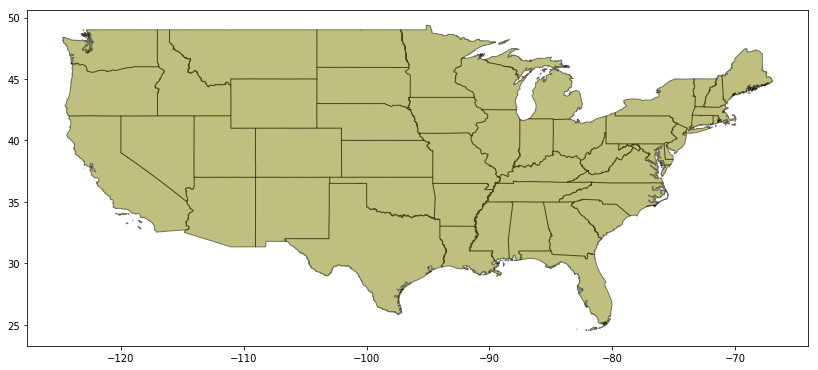

In [212]:
# Update the code below to map the conus_3857 and conus_5070 geodataframes overlayed.
base = conus.plot(color="blue", edgecolor="white", alpha=0.50, figsize=(14,10)) # UPDATE this with Web Mercator geodataframe
conus.plot(ax=base, color="yellow", edgecolor='black', alpha=0.50)       # Update this code with the Albers geodataframe


**Takeaway**

GeoPandas.plot() does not dyamically transfrom data with different CRSs so that they overlay on a map. You need to do that transformation explicitly.

## Any Questions?


---



# Spatial Measurements



Geopandas uses the  [Shapely library](https://shapely.readthedocs.io/en/stable/manual.html) to compute spatial measurements like area and length for individual geometries or all the geometries in a geoseries.  The available measurements depend on the geometry type. For example, we can compute area and perimeter for polygons, length for lines, and distances between points.  Read the GeoPandas and Shapely documentation to get a sense of all the meausurements you can compute.


## Calculating Area

Let's compute the area of a single state geometry in the `conus` GeoDataFrame.

In [213]:
conus[conus['STATE']=='Utah'].area

26    22.974876
dtype: float64

Above, **area** is a pandas series.  You can use the *squeeze* method to return just the value when the geoseries only has one element.


In [215]:
conus[conus['STATE']=='Utah'].area.squeeze()

22.974875755980896

### Question  - What are the units for the above area value?

## Spatial Measurements and CRSs

It doesn't make sense to compute spatial measurements using geographic coordinates (latitude and longitude) because the units are decimal degrees. 

Let's redo the above area meansurement using the Albers GeoDataFrame `conus_5070`.  Since the units are square meters  we will convert the result to square kilometers by dividing by 1000 x 1000.

* You can find the units for a CRS by looking it up by EPSG code on the website <https://spatialreference.org>.

In [216]:
# Area Utah in sq kilometers
conus_5070[conus_5070['STATE']=='Utah'].area.squeeze() / (1000 *1000)

219883.25666670038

How close is that area measurement to what is reported in [Wikipedia](https://en.wikipedia.org/wiki/Utah) for the total area in square kilometers of Utah?

### Challenge
Calculate the area of Utah using the web mercator GeoDataFrame. Does it give a similar result to the Albers dataframe. Note, the units are also meters for this CRS.

In [0]:
# Your code here
# Calculate the area of Utah in sq KM using the Web Mercator geodataframe

### Challenge - Solution

In [217]:
# Calculate the area of Utah in sq KM using the Web Mercator geodataframe
conus_3857[conus_3857['STATE']=='Utah'].area.squeeze() / (1000 *1000)

368284.8271506388

### Spatial Measurements and GeoDataFrames

We can compute the area of all geometries in the geodataframe.

In [62]:
#conus.geometry.area
conus_5070.area

0     1.338981e+11
1     2.952345e+11
2     1.377325e+11
3     4.098800e+11
4     2.695998e+11
5     1.293094e+10
6     5.209220e+09
7     1.769297e+08
8     1.525862e+11
9     2.164436e+11
10    1.459187e+11
11    9.372161e+10
12    1.457424e+11
13    2.130958e+11
14    2.664612e+10
15    2.185579e+11
16    1.234952e+11
17    3.808309e+11
18    2.863730e+11
19    2.014909e+10
20    3.149165e+11
21    1.831088e+11
22    1.810373e+11
23    1.173429e+11
24    8.058797e+10
25    1.997273e+11
26    2.198833e+11
27    2.490232e+10
28    6.275482e+10
29    2.533350e+11
30    1.509573e+11
31    1.046588e+11
32    1.221410e+11
33    8.490114e+10
34    2.125224e+10
35    1.510464e+11
36    1.805446e+11
37    2.003349e+11
38    2.403864e+10
39    1.269861e+11
40    1.285984e+11
41    1.068681e+11
42    2.513371e+11
43    2.846336e+09
44    1.091505e+11
45    6.877507e+11
46    1.048424e+11
47    1.754417e+11
48    1.453646e+11
dtype: float64

Above, we dynamically calculated area. But we can also adding it to a new column the GeoDataFrame.

In [218]:
# Update the GeoDataFrame
conus_5070['areaKM'] = conus_5070.area / (1000*1000)
conus_5070.head(15)

,STATE,GEOID,ABBREV,geometry,country,areaKM
0,Alabama,01,AL,"MULTIPOLYGON (((760323.731 857474.728, 760524....",usa,133898.110994
1,Arizona,04,AZ,"POLYGON ((-1746851.979 1221914.112, -1746649.6...",usa,295234.544408
2,Arkansas,05,AR,"POLYGON ((122663.982 1495564.993, 122680.313 1...",usa,137732.450416
3,California,06,CA,"MULTIPOLYGON (((-2066923.367 1403703.122, -206...",usa,409879.963898
4,Colorado,08,CO,"POLYGON ((-1123222.584 1807303.824, -1121310.5...",usa,269599.763558
5,Connecticut,09,CT,"MULTIPOLYGON (((1913282.319 2261224.283, 19132...",usa,12930.937770
6,Delaware,10,DE,"MULTIPOLYGON (((1727522.772 2019061.203, 17277...",usa,5209.219959
7,District of Columbia,11,DC,"POLYGON ((1610776.964 1928085.948, 1611258.938...",usa,176.929722
8,Georgia,13,GA,"MULTIPOLYGON (((1390721.939 1022647.032, 13908...",usa,152586.245831
9,Idaho,16,ID,"POLYGON ((-1673716.600 2566368.716, -1673032.1...",usa,216443.592508


## Calculating Length or Perimeter

Similarly we can calculate the perimeter of one or all state polygons.

In [0]:
# Perimeter of all states
conus_5070['perimeterKM'] = conus_5070.length / 1000


In [220]:
conus_5070.head()

,STATE,GEOID,ABBREV,geometry,country,areaKM,perimeterKM
0,Alabama,01,AL,"MULTIPOLYGON (((760323.731 857474.728, 760524....",usa,133898.110994,1958.012300
1,Arizona,04,AZ,"POLYGON ((-1746851.979 1221914.112, -1746649.6...",usa,295234.544408,2389.725447
2,Arkansas,05,AR,"POLYGON ((122663.982 1495564.993, 122680.313 1...",usa,137732.450416,2152.048763
3,California,06,CA,"MULTIPOLYGON (((-2066923.367 1403703.122, -206...",usa,409879.963898,4354.666849
4,Colorado,08,CO,"POLYGON ((-1123222.584 1807303.824, -1121310.5...",usa,269599.763558,2099.826325


## Calculating Distance
We can compute the shortest distance between geometries using the GeoSeries **distance** method.  This method calculates the shortest distance between two geometries or between a GeoSeries and a geometry.

### Computing the Distance between two points

Let's compute the distance between two `orleans_places`: **Attakapas** and **New Orleans**

In [241]:
# Take a look at the gdf
orleans_places

,place,desc,longitude,latitude,geometry
0,Attakapas,A region to the southwest of Pointe Coupée tow...,-91.934000,29.953000,POINT (-91.93400 29.95300)
1,Avoyelles,"An region adjacent to northwest Pointe Coupée,...",-92.020600,31.028500,POINT (-92.02060 31.02850)
2,Bayou St. Jean,An area between New Orleans and Lake Pontchart...,-90.126200,30.011200,POINT (-90.12620 30.01120)
3,Cabahanocé,An area in present-day St. James Parish along ...,-90.893000,30.098000,POINT (-90.89300 30.09800)
4,Galveztown,"A settlement just southeast of Baton Rouge, no...",-91.014000,30.440000,POINT (-91.01400 30.44000)
5,German Coast,A region along the Mississippi River north of ...,-90.577000,30.071000,POINT (-90.57700 30.07100)
6,Iberville,A region adjacent to the southern border of Po...,-91.049000,30.334000,POINT (-91.04900 30.33400)
7,Lafourche de Chetimachas,"Lafourche or, the fork, is nown today as the B...",-90.808000,29.747000,POINT (-90.80800 29.74700)
8,Lafourche interior,A region of early colonial settlement along th...,-90.986000,29.672000,POINT (-90.98600 29.67200)
9,Natchez,A settlement on the Mississippi River north o...,-91.439000,31.611000,POINT (-91.43900 31.61100)


In [243]:

baton_rouge = orleans_places[orleans_places.place == 'Baton Rouge'].geometry
new_orleans = orleans_places[orleans_places.place == 'New Orleans'].geometry

baton_rouge.distance(new_orleans.squeeze())

13    1.223392
dtype: float64

As with area calculations, distance calculations require a GeoDataFrame with an appropriate CRS.  Let's dynamically convert to EPSG 5070 and check the result.


In [244]:
baton_rouge.to_crs(5070).distance(new_orleans.to_crs(5070).squeeze()) / 1000

13    120.803143
dtype: float64

You can check that on Google Maps to see if it is more or less correct.

We can extend this and calculate the distance between all places and New Orleans, the capital of the Orleans Territory.

In [259]:
orleans_places['dist2nola_km'] = orleans_places.to_crs(5070).distance(new_orleans.to_crs(5070).geometry.squeeze()) / 1000
orleans_places

,place,desc,longitude,latitude,geometry,dist2nola,dist2nola_km
0,Attakapas,A region to the southwest of Pointe Coupée tow...,-91.934000,29.953000,POINT (-91.93400 29.95300),180081.442576,180.081443
1,Avoyelles,"An region adjacent to northwest Pointe Coupée,...",-92.020600,31.028500,POINT (-92.02060 31.02850),221874.674231,221.874674
2,Bayou St. Jean,An area between New Orleans and Lake Pontchart...,-90.126200,30.011200,POINT (-90.12620 30.01120),8366.002292,8.366002
3,Cabahanocé,An area in present-day St. James Parish along ...,-90.893000,30.098000,POINT (-90.89300 30.09800),81160.064765,81.160065
4,Galveztown,"A settlement just southeast of Baton Rouge, no...",-91.014000,30.440000,POINT (-91.01400 30.44000),105737.660602,105.737661
5,German Coast,A region along the Mississippi River north of ...,-90.577000,30.071000,POINT (-90.57700 30.07100),50803.111636,50.803112
6,Iberville,A region adjacent to the southern border of Po...,-91.049000,30.334000,POINT (-91.04900 30.33400),103396.524769,103.396525
7,Lafourche de Chetimachas,"Lafourche or, the fork, is nown today as the B...",-90.808000,29.747000,POINT (-90.80800 29.74700),75260.974781,75.260975
8,Lafourche interior,A region of early colonial settlement along th...,-90.986000,29.672000,POINT (-90.98600 29.67200),94249.697237,94.249697
9,Natchez,A settlement on the Mississippi River north o...,-91.439000,31.611000,POINT (-91.43900 31.61100),225808.646277,225.808646


We could also apply the distance function to the orleans_places gdf with `map`.

In [261]:
orleans_places.to_crs(5070).geometry.map(lambda g: g.distance(new_orleans.to_crs(5070).geometry.squeeze())/1000)

0     180.081443
1     221.874674
2       8.366002
3      81.160065
4     105.737661
5      50.803112
6     103.396525
7      75.260975
8      94.249697
9     225.808646
10    383.621152
11      0.000000
12    165.141316
13    120.803143
14    201.493424
Name: geometry, dtype: float64

### Computing the Distance between two polygons

Distance calculations aren't limited to points or to points and polygons. 

We can also compute the shortest distance in kilometers between CA and Washington state.

First, let's get the geometry for both states.

In [245]:
#Extract the geometry for WA
wa_geom = conus_5070[conus_5070['STATE']=='Washington'].geometry
print(type(wa_geom))
print(wa_geom)

#Extract the geometry for CA 
ca_geom = conus_5070[conus_5070['STATE']=='California'].geometry
print(type(ca_geom))
print(ca_geom)



<class 'geopandas.geoseries.GeoSeries'>
47    MULTIPOLYGON (((-1955449.972 3053081.849, -195...
Name: geometry, dtype: geometry
<class 'geopandas.geoseries.GeoSeries'>
3    MULTIPOLYGON (((-2066923.367 1403703.122, -206...
Name: geometry, dtype: geometry


Now, compute the distance using the `distance` method.

* Note the different implementations below.


In [246]:
# Compute the distance between the a GeoSeries and a geometry
wa_geom.distance(ca_geom[3]) / 1000

47    394.244484
dtype: float64

In [247]:
# Compute the distance between two geometries
wa_geom[47].distance(ca_geom[3]) / 1000

394.2444837095572

In [248]:
# Doing it all on one line
conus_5070[conus_5070['STATE']=='Washington'].geometry[47].distance(conus_5070[conus_5070['STATE']=='California'].geometry[3]) / 1000

394.2444837095572

*How does the command in the next cell differ from the previous command?*

In [249]:
conus_5070[conus_5070['STATE']=='Washington'].geometry[47].centroid.distance(conus_5070[conus_5070['STATE']=='California'].geometry[3].centroid) / 1000

1140.814402076295

Alternatively we can reset the indices so we know that the result will be in the first (zero indexed row)

In [250]:
wa_geom = conus_5070[conus_5070['STATE']=='Washington'].reset_index().geometry
ca_geom = conus_5070[conus_5070['STATE']=='California'].reset_index().geometry
wa_geom.distance(ca_geom) / 1000

0    394.244484
dtype: float64

### Apply Distance Calculation to all rows in a GeoDataFrame

What state is the farthest from CA?

In [0]:
# Calculate the distance between each state's geometry and CA geometry
conus_5070['dist2cal'] = conus_5070.geometry.map(lambda g: g.distance(ca_geom[0])/1000)

In [73]:
# Display the 5 states farthest from CA
conus_5070.sort_values(by='dist2cal', ascending=False).head()

,STATE,GEOID,ABBREV,geometry,areaKM,perimeterKM,dist2cal
33,Maine,23,ME,"MULTIPOLYGON (((2236885.566 2742568.606, 22369...",84901.142648,3600.488627,3809.712916
43,Rhode Island,44,RI,"MULTIPOLYGON (((2020324.319 2335425.590, 20203...",2846.336120,573.365278,3735.708254
38,New Hampshire,33,NH,"MULTIPOLYGON (((2034590.041 2493495.602, 20346...",24038.644420,920.865736,3680.522156
27,Vermont,50,VT,"POLYGON ((1785001.083 2552231.814, 1784963.519...",24902.324925,898.305473,3614.436298
34,Massachusetts,25,MA,"MULTIPOLYGON (((2115202.912 2319485.197, 21161...",21252.237762,1632.631674,3600.151540


### Challenge

Use the results from the previous distance calculations to view the states that border CA.

In [0]:
# Your code here

### Challenge - Solution

In [253]:
# Display the 5 states NEAREST TO CA
conus_5070.sort_values(by='dist2cal', ascending=True).head()

,STATE,GEOID,ABBREV,geometry,country,areaKM,perimeterKM,dist2cal
1,Arizona,04,AZ,"POLYGON ((-1746851.979 1221914.112, -1746649.6...",usa,295234.544408,2389.725447,0.000000
3,California,06,CA,"MULTIPOLYGON (((-2066923.367 1403703.122, -206...",usa,409879.963898,4354.666849,0.000000
42,Oregon,41,OR,"MULTIPOLYGON (((-2102992.965 2892293.209, -210...",usa,251337.071871,2360.518896,0.000000
18,Nevada,32,NV,"POLYGON ((-2031497.459 2058493.815, -2031048.1...",usa,286373.046471,2368.287641,0.000000
26,Utah,49,UT,"POLYGON ((-1569460.993 1766705.668, -1569165.1...",usa,219883.256667,1975.018969,194.678244


## CRSs and Distance Calculations

Compute the minimum distance in KM between Washington & California using the Web Mercator GeoDataFrame `conus_3857`.

* *Do you get the same result?*

In [75]:
# Your code here
wm_dist_m = conus_3857[conus_3857['STATE']=='Washington'].squeeze().geometry.distance(conus_3857[conus_3857['STATE']=='California'].squeeze().geometry)
wm_dist_km = wm_dist_m / 1000
print("web mercator dist KM:", wm_dist_km)
#
al_dist_m = conus_5070[conus_5070['STATE']=='Washington'].squeeze().geometry.distance(conus_5070[conus_5070['STATE']=='California'].squeeze().geometry)
al_dist_km = al_dist_m / 1000
print("Albers dist KM:", al_dist_km)


web mercator dist KM: 545.1742085797556
Albers dist KM: 394.2444837095572


 ### Question
 
 Which of the above CRSs returned the best result?  Let's check it in [Google Maps](http://maps.google.com) to find out.

## Spatial Measurements and CRSs - Recap

The output of spatial measurements depend on the CRS and is expressed in the units of the CRS. The Shapely library assumes a two dimensional planar coordinate system and makes no transformation on the data - that is left for the analyst.

Key Takeaways: 

1. **Don't use geographic coordinates for spatial measurement queries**. The results in decimal degrees are meaningless!

2. Use the CRS that is best for the type the spatial operation and geographic region. 

3. Always check your work.


## Any Questions?


---



# Spatial Relationship Queries



[Spatial relationship queries](https://en.wikipedia.org/wiki/Spatial_relation) consider how two geometries or sets of geometries relate to one another in space. 

<img src="https://upload.wikimedia.org/wikipedia/commons/5/55/TopologicSpatialRelarions2.png" height="400px"></img>


Here is a list of the most commonly used GeoPandas methods to test spatial relationships.

- [within](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.within)
- [contains](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.contains) (the inverse of `within`)
- [intersects](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.intersects)

<br>
There several other GeoPandas spatial relationship predicates but they are more complex to properly employ. For example the following two operations only work with geometry that are completely aligned.

- [touches](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.touches)
- [equals](http://geopandas.org/reference.html?highlight=distance#geopandas.GeoSeries.equals)


These methods takes the form:

    `Geoseries.contains(geometry)`

Let's consider some spatial relationship queries between GeoPandas geometries.

To start, let's create some GeoPandas polygon objects that represent Louisiana geographies.

In [0]:
# Louisiana today
la_poly = conus[conus['STATE']=='Louisiana'].reset_index() 

# Louisiana in 1810 as the Orleans Territory
orleans_poly = usa1810[usa1810['STATE']=='Orleans Territory'].reset_index() 

# The Parish (or county) of Pointe Coupee, Louisiana in 1810
ptcoupee_poly = usa1810[usa1810['COUNTY']=='Pointe Coupee'].reset_index()


### Questions

What types of GeoPandas objects are these?

Let's plot the three on the same map...

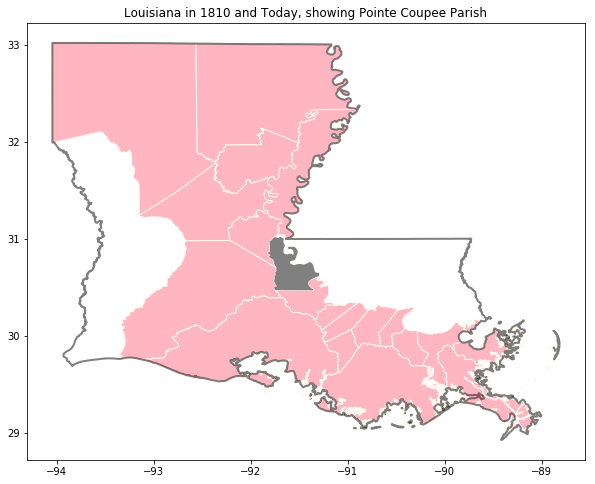

In [78]:
base = orleans_poly.plot(color="lightpink", edgecolor="floralwhite", figsize=(10,10))
la_poly.plot(ax=base, color='none', edgecolor="black", linewidth=2, alpha=0.5)
ptcoupee_poly.plot(ax=base, color="grey")
plt.title('Louisiana in 1810 and Today, showing Pointe Coupee Parish')
plt.show()

All but one of these three GeoDataFrames have a GeoSeries with just one geometry. 

* **Question** - Which one has more than one?

In [79]:
print("la_poly has this many geometries: ", len(la_poly.geometry))
print("ptcoupee_poly has this many geometries: ", len(ptcoupee_poly.geometry))
print("orleans_poly has this many geometries: ", len(orleans_poly.geometry))



la_poly has this many geometries:  1
ptcoupee_poly has this many geometries:  1
orleans_poly has this many geometries:  20


Let's consider a few simple spatial relationship queries.

<br>

Is Pointe Coupee Parish (ptcoupee_poly) within Louisiana (la_poly)?


In [81]:
ptcoupee_poly.within(la_poly)

0    True
dtype: bool

### Challenge

Restate the above query using **contains**?

In [0]:
# Your code here

### Challenge - Solution

In [84]:
la_poly.contains(ptcoupee_poly)

0    True
dtype: bool

### Check your work.

These queries seem simple but can be tricky. Sometimes it is good to ask questions you know are not true just to test that your syntax is correct.

* Does within Pointe Coupee Parish contain Louisiana?

In [85]:
ptcoupee_poly.contains(la_poly)

0    False
dtype: bool

### Spatial Relationship queries with more complex GeoSeries


In the above queries we compared geometries 1 to 1 - where each spatial object only contained one geometry.

Now, let's ask more complex queries, comparing GeoSeries with more than 1 geometry

Keep in mind:

* la_poly has just one geometry - for the state of Louisiana.
* ptcoupee_poly has one geometry - for Pointe Coupee Parish.
* orleans_poly has 20 geometries, one for each parish in Orleans Territory
* conus has 49 geometries, one for each US State in 2017.
* usa1810 has many geometries, one for each county in all states and territories in 1810.




Even though we already know the answer, let's see how we ask the question:

> *In what US state (conus) is Pointe Coupee Parish located?*


First, let's check that `conus` contains Point Coupee Parish.


In [89]:
conus.contains(ptcoupee_poly.geometry[0])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32     True
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
dtype: bool

### Question:

*How does the above **contains** syntax and result differ from what we used earlier?*

### Important

When comparing one geometry (ptcoupee_poly) to a GeoSeries with more than one geometry (conus) you need to explicitly reference that one geometry.

* GeoSeries geometry in `la_poly` is **implicitly** compared to the one geometry in the `ptcoupee_poly` GeoSeries:

  `la_poly.contains(ptcoupee_poly)`

<br>
<p>
  Compared to:
</p>
  

* GeoSeries geometries in `consus` are **explicitly** compared to the one geometry in the **ptcoupee_poly** GeoSeries: 

  `conus.contains(ptcoupee_poly.geometry[0])`
 


### Answering questions with spatial relationship queries

Use the results from the `contains` query to answer the question *what state contains Pointe Coupee Parish?*

In [831]:
conus[conus.contains(ptcoupee_poly.geometry[0])== True]

,STATE,GEOID,ABBREV,geometry,area,dist2cal
32,Louisiana,22,LA,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",11.544209,1852.156825



### Challenge: 

1. Were all Orleans Territory Parishes within what is now Louisiana?

2. If not, what parishes are not now in Louisiana?

3. Make a map of those Parishes on top of Louisiana (la_poly).

In [0]:
# Your code - were all Orleans Territory parishes in Louisiana?

In [0]:
# Your code - what parishes were not?

In [0]:
# Your code - map of those parishes?

In [108]:
# were all Orleans Territory parishes in Louisiana?
orleans_poly.within(la_poly.geometry[0])

0     False
1      True
2     False
3      True
4      True
5      True
6      True
7      True
8     False
9     False
10    False
11    False
12     True
13     True
14    False
15    False
16    False
17     True
18     True
19     True
dtype: bool

In [110]:
#what parishes were not?
parishes_not_in_la= orleans_poly[~orleans_poly.within(la_poly.geometry[0])]
parishes_not_in_la

,index,DECADE,COUNTY,STATE,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry
0,16,1810,St Bernard,Orleans Territory,G4170315,4170315,1.257319e+09,2.135876e+06,"MULTIPOLYGON (((-89.49316 29.62918, -89.50395 ..."
2,34,1810,Concordia,Orleans Territory,G4170115,4170115,4.111629e+09,7.277508e+05,"POLYGON ((-91.07911 32.05025, -91.08091 32.047..."
8,240,1810,Attakapas,Orleans Territory,G4170055,4170055,1.074766e+10,1.180592e+06,"MULTIPOLYGON (((-91.67890 30.39473, -91.66406 ..."
9,285,1810,Opelousas,Orleans Territory,G4170195,4170195,1.109640e+10,6.232069e+05,"POLYGON ((-91.74499 30.47224, -91.74234 30.466..."
10,292,1810,Natchitoches,Orleans Territory,G4170175,4170175,1.969507e+10,6.943296e+05,"POLYGON ((-92.56275 33.01282, -92.55158 31.898..."
11,327,1810,Lafourche,Orleans Territory,G4170155,4170155,6.816202e+09,3.303888e+06,"MULTIPOLYGON (((-90.62793 29.25023, -90.62763 ..."
14,398,1810,Plaquemines,Orleans Territory,G4170255,4170255,2.829562e+09,3.296649e+06,"MULTIPOLYGON (((-89.91104 29.86855, -89.90830 ..."
15,404,1810,Ouachitta,Orleans Territory,G4170235,4170235,1.443903e+10,7.905048e+05,"POLYGON ((-90.97567 32.41111, -90.98072 32.408..."
16,418,1810,Orleans,Orleans Territory,G4170215,4170215,1.601946e+09,1.069389e+06,"MULTIPOLYGON (((-89.81648 29.93380, -89.83925 ..."


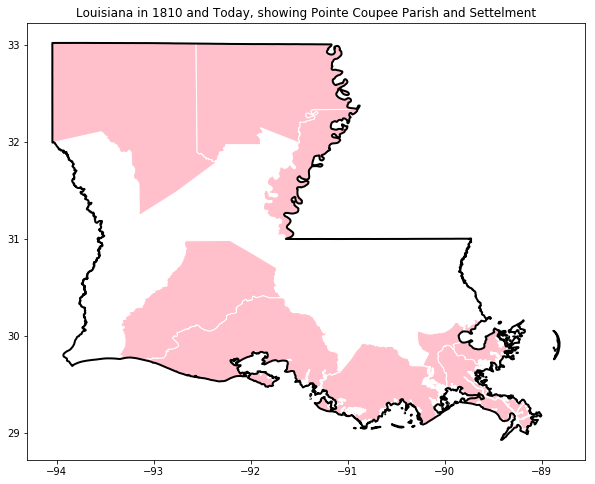

In [112]:
map of those parishes?
base = parishes_not_in_la.plot(color="pink", edgecolor="white",figsize=(10,10))
la_poly.plot(ax=base, color="none", edgecolor="black", linewidth=2)
plt.title('Louisiana in 1810 and Today, showing Pointe Coupee Parish and Settelment')
plt.show()

### Question

Why does the `within operator` indicate that there are several Orleans Territory parishes that are not within Louisiana?

*Discussion*

##  Intersects - the most general and therefore most useful spatial relationship query

The most useful, fastest and most general purpose spatial relationship query is **intersects**. You don't need to worry about selecting the correct spatial relationship predicate for your query or differences due to the resolution and alignment of your geometries.

</br>

Below we use *intersects* to see what states border Louisiana.


In [115]:
conus[conus.intersects(la_poly.geometry[0])]

,STATE,GEOID,ABBREV,geometry
2,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
16,Mississippi,28,MS,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
32,Louisiana,22,LA,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
45,Texas,48,TX,"MULTIPOLYGON (((-94.71830 29.72885, -94.71721 ..."


Intersects is not a directional operator like contains or withins. You can compare two geometries in any order and get the same result.

In [116]:
print(ptcoupee_poly.intersects(la_poly))

print(la_poly.intersects(ptcoupee_poly))

0    True
dtype: bool
0    True
dtype: bool


## More Complex Spatial Relationship Queries

Spatial relationship queries can get complex very quickly.  Consider this question:

What Orleans Parish contains each of the `orleans_places`?

* This is a tough one! We are comparing two GeoSeries with many geometries.
* This requires more or more for loops or apply functions

In [297]:
for index, row in orleans_places.iterrows():
  p_geom = row['geometry']
  p_name = row['place']
  
  for index2,row2 in orleans_poly.iterrows():
    o_geom = row2['geometry']
    o_name = row2['COUNTY']
    
    if o_geom.contains(p_geom):
      print(p_name, " was in", o_name, "Parish")


Attakapas  was in Attakapas Parish
Avoyelles  was in Avoyelles Parish
Bayou St. Jean  was in Orleans Parish
Cabahanocé  was in St James Parish
German Coast  was in St John Baptiste Parish
Lafourche de Chetimachas  was in Lafourche Parish
Lafourche interior  was in Lafourche Parish
Natchitoches  was in Natchitoches Parish
New Orleans  was in Orleans Parish
Pointe Coupée  was in Pointe Coupee Parish
Opelousas  was in Opelousas Parish


When your queries start to get that hairy it's a good time to ask *is there another way*?  There often is!

We will turn to this in our next section on Spatial Joins.

## Any Questions?



---



# Combining Data with Attribute & Spatial Joins

Joins are used to combine data in different tables.

* **Attribute joins** combine data based on common values.

* **Spatial joins** combine data based on location.



# Spatial Joins

We can use a spatial join to combine attributes from different GeoDataFrames for objects that are colocated in space.

In `geopandas` this is done with the **sjoin** operator.  

First take a quick look at the documentation for **sjoin**.

In [0]:
#gpd.sjoin?

Let's explore spatial joins revisiting the question we asked in the last section.

* What Orleans Parish contains each of the orleans_places?

Here we are interested in adding the parish name to the gdf of orleans_places.

### SJOIN

We are now ready to use **sjoin** to add the parish (county) for each conspiracy.

In [332]:
# gpd.sjoin(left_df, right_df, how='inner', op='intersects', lsuffix='left', rsuffix='right') 
#
orleans_places2 = gpd.sjoin(orleans_places, orleans_poly)

orleans_places2.head()

,place,desc,longitude,latitude,geometry,dist2nola,dist2nola_km,index_right,index,DECADE,COUNTY,STATE,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN
0,Attakapas,A region to the southwest of Pointe Coupée tow...,-91.9340,29.9530,POINT (-91.93400 29.95300),180081.442576,180.081443,8,240,1810,Attakapas,Orleans Territory,G4170055,4170055,1.074766e+10,1.180592e+06
1,Avoyelles,"An region adjacent to northwest Pointe Coupée,...",-92.0206,31.0285,POINT (-92.02060 31.02850),221874.674231,221.874674,5,209,1810,Avoyelles,Orleans Territory,G4170075,4170075,1.827011e+09,2.252641e+05
2,Bayou St. Jean,An area between New Orleans and Lake Pontchart...,-90.1262,30.0112,POINT (-90.12620 30.01120),8366.002292,8.366002,16,418,1810,Orleans,Orleans Territory,G4170215,4170215,1.601946e+09,1.069389e+06
11,New Orleans,The capital city of Orleans Territory,-90.0666,29.9564,POINT (-90.06660 29.95640),0.000000,0.000000,16,418,1810,Orleans,Orleans Territory,G4170215,4170215,1.601946e+09,1.069389e+06
3,Cabahanocé,An area in present-day St. James Parish along ...,-90.8930,30.0980,POINT (-90.89300 30.09800),81160.064765,81.160065,19,567,1810,St James,Orleans Territory,G4170355,4170355,1.179172e+09,1.944826e+05


The result of this `sjoin` is a new `GeoDataFrame` that has one row for each orleans_place and additional columns of attribute data from the orleans_poly GeoDataFrame for the geometries spatially *interesected*.

* Check the number of rows in `orleans_places` and `orleans_places2` - to they match?

In [333]:
print(len(orleans_places))
print(len(orleans_places2))

15
11


By default, `sjoin` only returns rows where an intersection was found. This is determined by the **how=** function parameter which defaults to `inner`.

If we set this to **how='left'** we will keep all the rows for the GeoDataFrame named on the left, here orleans_places.

This way we can see what places are not within Orleans Territory.

In [334]:
orleans_places2 = gpd.sjoin(orleans_places, orleans_poly, how="left")

orleans_places2.head()

,place,desc,longitude,latitude,geometry,dist2nola,dist2nola_km,index_right,index,DECADE,COUNTY,STATE,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN
0,Attakapas,A region to the southwest of Pointe Coupée tow...,-91.9340,29.9530,POINT (-91.93400 29.95300),180081.442576,180.081443,8.0,240.0,1810,Attakapas,Orleans Territory,G4170055,4170055,1.074766e+10,1.180592e+06
1,Avoyelles,"An region adjacent to northwest Pointe Coupée,...",-92.0206,31.0285,POINT (-92.02060 31.02850),221874.674231,221.874674,5.0,209.0,1810,Avoyelles,Orleans Territory,G4170075,4170075,1.827011e+09,2.252641e+05
2,Bayou St. Jean,An area between New Orleans and Lake Pontchart...,-90.1262,30.0112,POINT (-90.12620 30.01120),8366.002292,8.366002,16.0,418.0,1810,Orleans,Orleans Territory,G4170215,4170215,1.601946e+09,1.069389e+06
3,Cabahanocé,An area in present-day St. James Parish along ...,-90.8930,30.0980,POINT (-90.89300 30.09800),81160.064765,81.160065,19.0,567.0,1810,St James,Orleans Territory,G4170355,4170355,1.179172e+09,1.944826e+05
4,Galveztown,"A settlement just southeast of Baton Rouge, no...",-91.0140,30.4400,POINT (-91.01400 30.44000),105737.660602,105.737661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can use some Pandas to massage our results...

In [335]:
# How many orleans_places do not have COUNTY data?
orleans_places2[orleans_places2.COUNTY.isnull()]

,place,desc,longitude,latitude,geometry,dist2nola,dist2nola_km,index_right,index,DECADE,COUNTY,STATE,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN
4,Galveztown,"A settlement just southeast of Baton Rouge, no...",-91.014000,30.440000,POINT (-91.01400 30.44000),105737.660602,105.737661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Iberville,A region adjacent to the southern border of Po...,-91.049000,30.334000,POINT (-91.04900 30.33400),103396.524769,103.396525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Natchez,A settlement on the Mississippi River north o...,-91.439000,31.611000,POINT (-91.43900 31.61100),225808.646277,225.808646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Baton Rouge,"Baton Rouge, named for a red post that marked ...",-91.184858,30.452573,POINT (-91.18486 30.45257),120803.143227,120.803143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can make a quick plot to check the results visually.

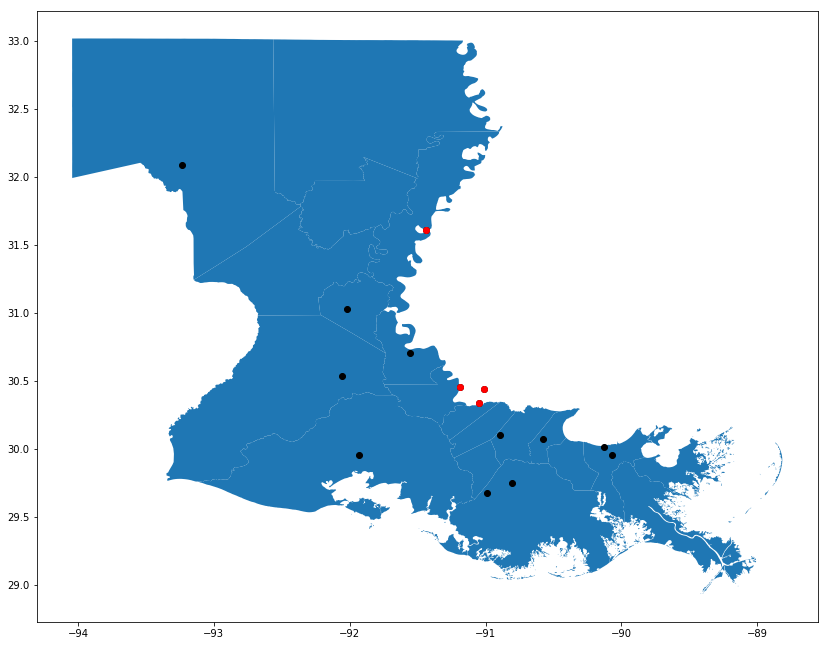

In [336]:
base=orleans_poly.plot(figsize=(14,14))
orleans_places.plot(ax=base, color="black")
orleans_places2[orleans_places2.COUNTY.isnull()].plot(ax=base, color="red")

Finally, we can subset out the columns we want to keep.

In [341]:
orleans_places2[['place','COUNTY']]

,place,COUNTY
0,Attakapas,Attakapas
1,Avoyelles,Avoyelles
2,Bayou St. Jean,Orleans
3,Cabahanocé,St James
4,Galveztown,NaN
5,German Coast,St John Baptiste
6,Iberville,NaN
7,Lafourche de Chetimachas,Lafourche
8,Lafourche interior,Lafourche
9,Natchez,NaN


### Challenge

Use a spatial join to identify the parishes in which the three LSC slave conspiracies (lsc_locs) took place.

In [339]:
# Your code here

Object `place` not found.


### Challenge - Solution

In [342]:
lsc_with_parish = gpd.sjoin(lsc_locs, usa1810, how="left")
lsc_with_parish[['name','COUNTY']]

,name,COUNTY
0,Mina Slave Conspiracy,Pointe Coupee
1,Pointe Coupee Slave Conspiracy,Pointe Coupee
2,German Coast Uprising,St John Baptiste


### Any Questions?

# Spatial Data Processing



Spatial relationship queries return `True` or `False` when comparing geometries based on a spatial relationship predicate. 

Geometric processing operations, on the other hand, construct new geometries from one or more input geometries. We saw this earlier with the **dissolve** operation.

These transformations, which are also called **geoprocessing**, make up the bulk of spatial preprocessing operations - the work you do to prepare your data for analysis!





## Common Types of Geoprocessing operations

Below is a list of some common types of geoprocessing operations.

- Coordinate system transformations
- Dimensionality transformations (points to polygons, polygons to points or lines, lines to polygons or points)
- Geometric Aggregations (simplify, dissolve / group by operations)
- Spatial overlay operations that perform set operations on input geometries and return new geometries that are the set intersection, union, difference.

An in-depth review of all of the types of and methods for geoprocessing is beyond the scope of this workshop.   A good way to get an overview is to work through the different sections of the Geopandas documentation.

Instead, we will work through a few of these as we explore our historical Louisiana data.

### Question

What types of geoprocesing operations we have explored so far?

## Geometric Aggregrations

We often receive data that has more detail than we need. For example, we might have population by county when we want it by state. In pandas you can use a `groupby` operation to aggregate the data values.  

With geospatial data we often obtain data that has more geometric detail than we need. We can use the geopandas **dissolve** method to aggregate geometric data that share a common value.

For example, let's create a single geometry that is the outline of the continental US by dissolving the state geometry in the `conus` geodataframe. 
Start by taking a look at the geodataframe again.


In [129]:
conus.head()

,STATE,GEOID,ABBREV,geometry,country
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",usa
1,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",usa
2,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499...",usa
3,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",usa
4,Colorado,08,CO,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",usa


We need a column value to indicate how to aggregate the geometry. We can create this column and populate it if it doesn't exist. 


In [130]:
# create a column with a single value that we can dissolve on
conus['country'] = 'usa' 
conus.head()

,STATE,GEOID,ABBREV,geometry,country
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",usa
1,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",usa
2,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499...",usa
3,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",usa
4,Colorado,08,CO,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",usa


Now we can use the **dissolve** method to merge all the states that have the value "usa" in the country column.

Note, **dissolve** won't know what to do with the values specific to each state - like STATE (name), GEOID, ABBREV, so we remove those columns first.

In [131]:
# Select on the columns we weant to keep in dissovled geodataframe
conus_outline = conus[["country","geometry"]]  

# dissolve the interior polygons
conus_outline = conus_outline.dissolve(by='country', as_index=False)

# take a look
conus_outline.head()



,country,geometry
0,usa,"MULTIPOLYGON (((-82.00977 24.53491, -82.00931 ..."


Finally, **plot** the dissolved geodataframe.

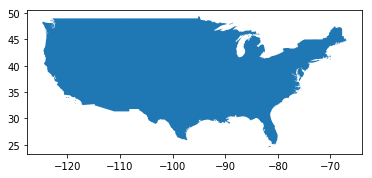

In [120]:

conus_outline.plot()

## Challenge

1. Use **dissolve** to create the new GeoDataFrame **usa1810_outline**
    - *Note: you do not need to add a new column - what column can you use to dissolve by?*


In [122]:
usa1810.head(2)

,DECADE,COUNTY,STATE,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry
0,1810,Montgomery,Virginia,G5101210,5101210,2.704401e+09,250108.550595,"POLYGON ((-80.08746 37.16090, -80.09036 37.156..."
1,1810,Montgomery,Maryland,G2400310,2400310,1.311046e+09,174262.163686,"POLYGON ((-76.88789 39.13175, -76.89350 39.123..."


In [0]:
# your code here


### Challenge - solution

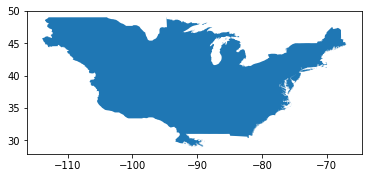

In [123]:

# Select on the columns we weant to keep in dissovled geodataframe
usa1810_outline = usa1810[["DECADE","geometry"]]  

# dissolve the interior polygons
usa1810_outline = usa1810_outline.dissolve(by='DECADE', as_index=False)

# take a look
#usa1810_outline.head()
usa1810_outline.plot()

## Challenge 

Display the **usa1810_outline** on top of the **conus_outline**

- *HINT: You can do this quickly by copying related code from a previous section and changing the geodataframe names*

In [0]:
# Your code here

### Challenge - solution

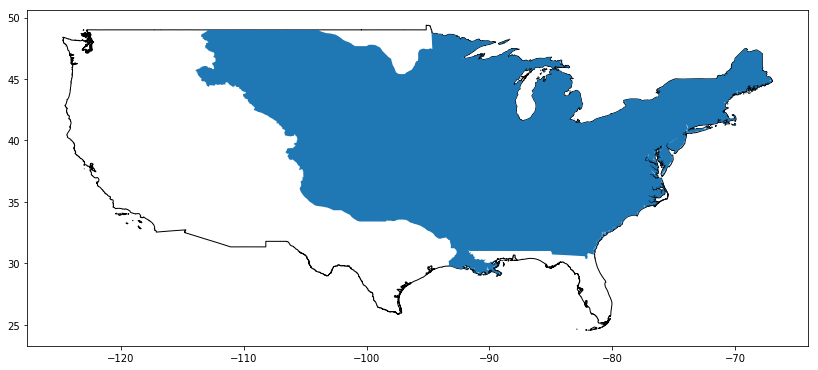

In [124]:
# your code here
base = conus_outline.plot(color='white', edgecolor='black',  figsize=(14,10))
usa1810_outline.plot(ax=base)



---



## Attribute Joins

Attribute joins combine data from different tables based on a column with shared values.  Although these are not spatial they are widely used in geospatial analysis and in all data analysis.  We use the **merge** command for geopandas attribute joins.

<br>
Let's use an attribute join to join some census data for Orleans Territory to a subset of the usa1810 data.

First, read in the CSV file to a Pandas DataFrame named **orleans_census1810**



In [0]:
orleans_census1810 = pd.read_csv('./orleans_census_data1810.csv')
orleans_census1810.head()

Then, subset `usa1810` to a new GeoDataFrame keeping only the data where the STATE is Orleans Territory - name this gdf  **orleans**.


In [0]:
orleans = usa1810[usa1810['STATE'] == 'Orleans Territory']

orleans.plot()



First, let's take a look at the values in the **orleans** GeoDataFrame.  Compare it to the **orleans_census1810** data frame.

- What column should we use for the join?

In [0]:
orleans.head()

Join the attribute data in **orleans_census1810** to the **orleans** GeoDataFrame using the **merge** command.

In [0]:

orleans_popdata = orleans.merge(orleans_census1810, on='GISJOIN')
orleans_popdata.head()

You can see that we now have a number of population related attributes in the geodataframe.

What happened to the columns that were in both dataframes?

## Questions?



---



# Data Driven Mapping



Data driven mapping refers to the process of creating thematic maps by using data values to determine the symbology of mapped features - including their color, shape, size.  This is in contrast to setting the same symbology for all features as we have done above.

### Mapping categorical data
We can symbolize the color of our features by a categorical data value.

In [0]:
conus.plot(column="STATE", edgecolor="white")


### Mapping quantitative data

We can also color areas by quantitave data values. 

</br>

Let's map the parishes in Orleans Territory by the number of non-white slaves. These values are in the column `nwslave_pop`.


In [0]:
orleans_popdata.plot(column='nwslave_pop', cmap='Reds', edgecolor='grey', legend=True, figsize=(8,6))
plt.show()

### cmaps - colormaps

Note the use of the **cmap** option to set the matplotlib color palette for mapping the data.  Take a look at the [documumentation](https://matplotlib.org/users/colormaps.html) for these colormaps and rerun the previous code with a different value for **cmap**.   I strongly recommend that you read this documentation to improve your use of colormaps to effectively map data values. 

### Discussion

Above, the plot option **column=** tells the plot command to use the values in the **nwslave_pop** column to determine the geometry colors based on the colormap specified by the **cmap** option. You can see the list of available [color maps here](https://matplotlib.org/users/colormaps.html). The full range of values in the `nwslave_pop` column is being scaled to the color palette called **Reds**.  This is called an `unclassified` or `classless` map. This map is a good first effort as it imposses no grouping on the data, thus making it easier to spot trends and outliers. But it is harder to interpret the data values within an area. 


### Graduated Color Maps

A more common practice is to use a **classification scheme** to bin data values into 4-7 classes and map those classes to a color palette.  This type of map is called a **graduated color map**.

</br>

Let's try that below with **quantile** classification which is the most commonly used scheme when mapping data.

In [0]:

orleans_popdata.plot(column='nwslave_pop', cmap='Reds', edgecolor='black', 
                     legend=True, figsize=(8,6), scheme='quantiles')
plt.show()

Wow that gives a very different looking map!

## Challenge

In the code cell below recreate the above map with the classification schemes **equal_interval** and **fisher_jenks** to see how the look of the map changes.


In [0]:
# Your code here

## Choropleth Maps

The maps we just made are called `choropleth maps`. A [choropleth map](https://en.wikipedia.org/wiki/Choropleth_map) is a data map that colors areas by data values.  This are the most common type of data map. It is also sometimes called a **heatmap**.

<br>
**Important**, when the areas being mapped vary in size it is not considered good cartographic practice to map **counts**.  Why do you think this is so?

Instead, choropleth maps typically symbolize ares by area weighted densites, ratios or rates that can compared across the different sized areas.

<br>

Let's map the ratio of non-white slaves (nwslave_pop) to free whites (white_pop).

In [0]:
# Create a new column that is the ratio of non-white slaves (nwslave_pop) to free whites (white_pop)
orleans_popdata['slave2white_ratio'] = orleans_popdata['nwslave_pop'] / orleans_popdata['white_pop']

# Map the ratio
orleans_popdata.plot(column='slave2white_ratio', cmap='Reds', edgecolor='black', 
                     legend=True, figsize=(8,6), scheme='quantiles')

plt.show()

In [0]:
orleans_popdata.head()

Let's redo the above map by adding labels and a few more niceties.

We will also use **fisher_jenks** classification to minimize within bin variance and maximize between bin variance. This creates groupings that better reflect the data.

In [0]:
fig, ax = plt.subplots(1, figsize=(12,12))

orleans_popdata.plot(ax=ax, column='slave2white_ratio', cmap='OrRd', edgecolor='black', legend=True, scheme='fisher_jenks')

for polygon, name in zip(orleans_popdata.geometry, orleans_popdata.COUNTY_x):
    ax.annotate(xy=(polygon.centroid.x, polygon.centroid.y), s=name)

_ = ax.axis('off')

ax.set_title("Ratio of Non-White Slaves to Free Whites, Orleans Territory, 1810")
plt.show()

Needless to say, labels are a bit tricky, regardless of the software you use to make a map!


## Question

In 1791 and 1795 two slave revolts were planned in the same parish in Orleans Territory. Although these plots involved different people and had different orgins, both were discovered and thwarted, leading to the trial and execution or emprisonment of many enslaved persons. Soon thereafter, the [German Coast Uprising of 1811](https://en.wikipedia.org/wiki/1811_German_Coast_uprising), which was the largest slave revolt in US history, occured in a different Orleans parish. 

- *Does the map symbology indicate the two parishes in which these three events occured?*

As a check, we can add the **lsc_locs** points to the map above.

In [0]:
fig, ax = plt.subplots(1, figsize=(12,12))

orleans_popdata.plot(ax=ax, column='slave2white_ratio', cmap='OrRd', edgecolor='black', legend=True, scheme='fisher_jenks')

lsc_locs.plot(ax=ax, color='yellow', edgecolor="black", linewidth=3, markersize=100)

for polygon, name in zip(orleans_popdata.geometry, orleans_popdata.COUNTY_x):
    ax.annotate(xy=(polygon.centroid.x, polygon.centroid.y), s=name)

_ = ax.axis('off')

ax.set_title("Ratio of Non-White Slaves to Free Whites, Orleans Territory, 1810")
plt.show()

###  Any Questions?



---



# Interactive Mapping with Folium

[Folium] is the most commonly used Python library for creating interactive maps.  See the online documentation for details. 

Below are a few examples for you to consider.

First load the library. Install it if necessary.

In [0]:
#!pip install folium
import folium

Create a simple interactive map centered on Pointe Coupee and with an intial zoom level of 10.

In [0]:
m = folium.Map(location=[ptcoupee_pt.y, ptcoupee_pt.x], tiles='Stamen Toner',
    zoom_start=10)
m

### Create a choropleth map in folium.

In [0]:
m = folium.Map(location=[ptcoupee_pt.y, ptcoupee_pt.x], tiles='Stamen Toner',
    zoom_start=8)

m.choropleth(orleans_popdata, data=orleans_popdata, key_on='feature.properties.GISJOIN',
             columns=['GISJOIN', 'nwslave_pop'], fill_color='YlOrBr')
m

### Point markers with Popups

First, need to make sure the coordinates are numeric!

In [0]:
lsc_locs['latitude'] = pd.to_numeric(lsc_locs["latitude"])
lsc_locs['longitude'] = pd.to_numeric(lsc_locs["longitude"])

In [0]:
m = folium.Map(location=[ptcoupee_pt.y, ptcoupee_pt.x], tiles='Stamen Toner',
    zoom_start=10)

for i in lsc_locs.index:
  folium.CircleMarker(
    location=[lsc_locs.latitude[i], lsc_locs.longitude[i]],
    radius= 10,
    popup= lsc_locs.name[i],
    color='red',
    fill=True,
    fill_color='red'
).add_to(m)


m

### Overlay points on our choropleth map.

In [0]:
m = folium.Map(location=[ptcoupee_pt.y, ptcoupee_pt.x], tiles='Stamen Toner',
    zoom_start=8)

m.choropleth(orleans_popdata, data=orleans_popdata, key_on='feature.properties.GISJOIN',
             columns=['GISJOIN', 'nwslave_pop'], fill_color='YlOrBr')

for i in lsc_locs.index:
  folium.CircleMarker(
    location=[lsc_locs.latitude[i], lsc_locs.longitude[i]],
    radius= 10,
    popup= lsc_locs.name[i],
    color='red',
    fill=True,
    fill_color='red'
).add_to(m)
  

m

## Any Questions?

# Next Steps



### Start with the Package Documentation

- [GeoPandas Documentation](http://geopandas.org/)
- [Shapely Documentation(https://shapely.readthedocs.io/en/stable/)]

### Check out the excellent Kaggle Tutorial on Geospatial Analysis  
- <https://www.kaggle.com/learn/geospatial-analysis>
- They also have a great Pandas tutorial.

### For a deep dive check out the SciPy 2018 workshop on geopandas.

- The notebooks are [here](https://github.com/geopandas/scipy2018-geospatial-data).
- And be sure to watch the [youtube video](https://www.youtube.com/watch?v=kJXUUO5M4ok). 

### More Geopandas Practice

- Try this [Geopandas tutorial](https://www.datacamp.com/community/tutorials/geospatial-data-python) on plotting the path of Hurricane Florence.



### Interactive mapping 

- The [mplleaflet](https://github.com/jwass/mplleaflet) and [folium](https://github.com/python-visualization/folium) packages are very popular for creating interactive web maps in python notebooks. Check out the online documentation and do a web search for an online tutorial to get started.


# Thank you!


---

Last updated 05/08/2019 by Patty Frontiera (pattyf [at] berkeley [dot] edu)